In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
df.shape

(5110, 12)

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df=df.fillna(0)

In [6]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    27.756732     0.048728  
std            45.283560     9.529497     0.215320  
min            55.120000     0.000000     0.000000  
25%            77.245000    22.900000     0.000000  
50%            91.885000    27.700000     0.000000  
75%           114.090000    32.800000     0.000000  
max           271.740000    97.600000     1.000000

In [10]:
df.corr().describe().T

count      mean       std       min       25%       50%  \
id                   7.0  0.155847  0.373292 -0.001296  0.002315  0.003550   
age                  7.0  0.320560  0.313727  0.003538  0.227465  0.245257   
hypertension         7.0  0.252170  0.340434  0.003550  0.091431  0.127904   
heart_disease        7.0  0.234410  0.351615 -0.026709  0.053505  0.134914   
avg_glucose_level    7.0  0.255665  0.336642  0.001092  0.107030  0.161857   
bmi                  7.0  0.196084  0.365050 -0.051791  0.023924  0.077656   
stroke               7.0  0.227803  0.353927 -0.051791  0.067146  0.131945   

                        75%  max  
id                 0.042022  1.0  
age                0.270097  1.0  
hypertension       0.225436  1.0  
heart_disease      0.212827  1.0  
avg_glucose_level  0.206322  1.0  
bmi                0.149437  1.0  
stroke             0.190086  1.0

In [11]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     27.756732
stroke                   0.048728
dtype: float64

In [12]:
df.max()

id                      72940
gender                  Other
age                      82.0
hypertension                1
heart_disease               1
ever_married              Yes
work_type            children
Residence_type          Urban
avg_glucose_level      271.74
bmi                      97.6
smoking_status         smokes
stroke                      1
dtype: object

In [13]:
df.min()

id                         67
gender                 Female
age                      0.08
hypertension                0
heart_disease               0
ever_married               No
work_type            Govt_job
Residence_type          Rural
avg_glucose_level       55.12
bmi                       0.0
smoking_status        Unknown
stroke                      0
dtype: object

In [14]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "id" is
 9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64
-------------------------------------------------
unique values in column "gender" is
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
-------------------------------------------------
unique values in column "age" is
 78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
-------------------------------------------------
unique values in column "hypertension" is
 0    4612
1     498
Name: hypertension, dtype: int64
-------------------------------------------------
unique values in column "heart_disease" is
 0    4834
1     276
Name: heart_disease, dtype: int64
-------------------------------------------------
unique values in column "ever_married" is


In [15]:
df.skew()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                 -0.169802
stroke               4.193284
dtype: float64

In [16]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   0.0     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [19]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [20]:
df_col=['gender', 'ever_married',
       'work_type', 'Residence_type','smoking_status']

In [21]:
for i in df_col:
    df[i]=le.fit_transform(df[i])

In [22]:
df.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21   0.0               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1

In [23]:
df=df.drop(['id'],axis='columns')

In [24]:
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21   0.0               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1

In [25]:
x=df.drop(['heart_disease'],axis='columns')
y=df.heart_disease.values

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


94.32485322896281

In [28]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1451
           1       0.31      0.05      0.08        82

    accuracy                           0.94      1533
   macro avg       0.63      0.52      0.53      1533
weighted avg       0.91      0.94      0.92      1533



In [29]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

90.47619047619048

In [30]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1451
           1       0.18      0.22      0.20        82

    accuracy                           0.90      1533
   macro avg       0.57      0.58      0.57      1533
weighted avg       0.91      0.90      0.91      1533



In [31]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

94.3900848010437

In [32]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1451
           1       0.39      0.09      0.14        82

    accuracy                           0.94      1533
   macro avg       0.67      0.54      0.56      1533
weighted avg       0.92      0.94      0.93      1533



In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

94.32485322896281

In [35]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1451
           1       0.37      0.09      0.14        82

    accuracy                           0.94      1533
   macro avg       0.66      0.54      0.55      1533
weighted avg       0.92      0.94      0.93      1533



In [36]:
from sklearn.ensemble import BaggingClassifier

In [37]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

93.8682322243966

In [38]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1451
           1       0.20      0.05      0.08        82

    accuracy                           0.94      1533
   macro avg       0.57      0.52      0.52      1533
weighted avg       0.91      0.94      0.92      1533



In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pred_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pred_gau)*100
accu_l

86.8232224396608

In [41]:
print(classification_report(ytest,pred_gau))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1451
           1       0.17      0.38      0.23        82

    accuracy                           0.87      1533
   macro avg       0.57      0.64      0.58      1533
weighted avg       0.92      0.87      0.89      1533



In [42]:
from sklearn.ensemble import ExtraTreesClassifier

In [44]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pred_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pred_etc)*100
accu_etc

93.47684279191128

In [45]:
print(classification_report(ytest,pred_etc))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1451
           1       0.05      0.01      0.02        82

    accuracy                           0.93      1533
   macro avg       0.50      0.50      0.49      1533
weighted avg       0.90      0.93      0.92      1533



In [46]:
from sklearn.svm import SVC

In [47]:
svc=SVC()
svc.fit(xtrain,ytrain)
pred_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pred_svc)*100
accu_svc

94.65101108936726

In [48]:
print(classification_report(ytest,pred_svc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1451
           1       0.00      0.00      0.00        82

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pred_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pred_rnd)*100
accu_rnd

94.25962165688193

In [51]:
print(classification_report(ytest,pred_rnd))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1451
           1       0.12      0.01      0.02        82

    accuracy                           0.94      1533
   macro avg       0.54      0.50      0.50      1533
weighted avg       0.90      0.94      0.92      1533



In [52]:
from catboost import CatBoostClassifier

In [53]:
cat=CatBoostClassifier()
cat.fit(xtrain,ytrain)

Learning rate set to 0.017754
0:	learn: 0.6632898	total: 316ms	remaining: 5m 15s
1:	learn: 0.6346853	total: 321ms	remaining: 2m 40s
2:	learn: 0.6109873	total: 326ms	remaining: 1m 48s
3:	learn: 0.5834637	total: 331ms	remaining: 1m 22s
4:	learn: 0.5633214	total: 336ms	remaining: 1m 6s
5:	learn: 0.5403433	total: 342ms	remaining: 56.6s
6:	learn: 0.5194085	total: 348ms	remaining: 49.4s
7:	learn: 0.5044018	total: 352ms	remaining: 43.6s
8:	learn: 0.4857159	total: 357ms	remaining: 39.3s
9:	learn: 0.4669605	total: 361ms	remaining: 35.8s
10:	learn: 0.4523285	total: 367ms	remaining: 33s
11:	learn: 0.4391392	total: 372ms	remaining: 30.6s
12:	learn: 0.4271100	total: 376ms	remaining: 28.6s
13:	learn: 0.4149526	total: 381ms	remaining: 26.8s
14:	learn: 0.3979174	total: 385ms	remaining: 25.3s
15:	learn: 0.3882641	total: 391ms	remaining: 24s
16:	learn: 0.3783800	total: 395ms	remaining: 22.9s
17:	learn: 0.3688594	total: 400ms	remaining: 21.8s
18:	learn: 0.3597400	total: 405ms	remaining: 20.9s
19:	learn: 

171:	learn: 0.1364653	total: 1.34s	remaining: 6.45s
172:	learn: 0.1362737	total: 1.34s	remaining: 6.43s
173:	learn: 0.1360446	total: 1.35s	remaining: 6.41s
174:	learn: 0.1358599	total: 1.35s	remaining: 6.38s
175:	learn: 0.1356729	total: 1.36s	remaining: 6.36s
176:	learn: 0.1354294	total: 1.36s	remaining: 6.34s
177:	learn: 0.1353269	total: 1.37s	remaining: 6.32s
178:	learn: 0.1351124	total: 1.37s	remaining: 6.3s
179:	learn: 0.1348955	total: 1.38s	remaining: 6.28s
180:	learn: 0.1346895	total: 1.38s	remaining: 6.26s
181:	learn: 0.1345032	total: 1.39s	remaining: 6.24s
182:	learn: 0.1343817	total: 1.39s	remaining: 6.21s
183:	learn: 0.1342011	total: 1.4s	remaining: 6.2s
184:	learn: 0.1340410	total: 1.4s	remaining: 6.17s
185:	learn: 0.1338917	total: 1.41s	remaining: 6.16s
186:	learn: 0.1336314	total: 1.41s	remaining: 6.14s
187:	learn: 0.1333956	total: 1.42s	remaining: 6.12s
188:	learn: 0.1332307	total: 1.42s	remaining: 6.1s
189:	learn: 0.1329903	total: 1.43s	remaining: 6.08s
190:	learn: 0.132

344:	learn: 0.1136181	total: 2.2s	remaining: 4.18s
345:	learn: 0.1135328	total: 2.21s	remaining: 4.17s
346:	learn: 0.1134416	total: 2.21s	remaining: 4.16s
347:	learn: 0.1133135	total: 2.22s	remaining: 4.15s
348:	learn: 0.1132558	total: 2.22s	remaining: 4.14s
349:	learn: 0.1131819	total: 2.23s	remaining: 4.13s
350:	learn: 0.1131246	total: 2.23s	remaining: 4.12s
351:	learn: 0.1130313	total: 2.23s	remaining: 4.11s
352:	learn: 0.1129260	total: 2.24s	remaining: 4.1s
353:	learn: 0.1128588	total: 2.24s	remaining: 4.09s
354:	learn: 0.1127393	total: 2.25s	remaining: 4.08s
355:	learn: 0.1125902	total: 2.25s	remaining: 4.07s
356:	learn: 0.1124791	total: 2.25s	remaining: 4.06s
357:	learn: 0.1123686	total: 2.26s	remaining: 4.05s
358:	learn: 0.1122966	total: 2.26s	remaining: 4.04s
359:	learn: 0.1121799	total: 2.27s	remaining: 4.03s
360:	learn: 0.1120471	total: 2.27s	remaining: 4.03s
361:	learn: 0.1119849	total: 2.28s	remaining: 4.01s
362:	learn: 0.1119556	total: 2.28s	remaining: 4s
363:	learn: 0.111

531:	learn: 0.0958506	total: 3.06s	remaining: 2.69s
532:	learn: 0.0957883	total: 3.06s	remaining: 2.68s
533:	learn: 0.0956743	total: 3.07s	remaining: 2.68s
534:	learn: 0.0955706	total: 3.07s	remaining: 2.67s
535:	learn: 0.0954605	total: 3.08s	remaining: 2.67s
536:	learn: 0.0954000	total: 3.08s	remaining: 2.66s
537:	learn: 0.0953123	total: 3.09s	remaining: 2.65s
538:	learn: 0.0952290	total: 3.1s	remaining: 2.65s
539:	learn: 0.0951720	total: 3.1s	remaining: 2.64s
540:	learn: 0.0950925	total: 3.11s	remaining: 2.64s
541:	learn: 0.0949819	total: 3.11s	remaining: 2.63s
542:	learn: 0.0949176	total: 3.12s	remaining: 2.63s
543:	learn: 0.0948422	total: 3.12s	remaining: 2.62s
544:	learn: 0.0947650	total: 3.13s	remaining: 2.61s
545:	learn: 0.0946740	total: 3.14s	remaining: 2.61s
546:	learn: 0.0946113	total: 3.15s	remaining: 2.6s
547:	learn: 0.0945638	total: 3.15s	remaining: 2.6s
548:	learn: 0.0944533	total: 3.16s	remaining: 2.59s
549:	learn: 0.0943599	total: 3.17s	remaining: 2.59s
550:	learn: 0.09

704:	learn: 0.0831930	total: 4.04s	remaining: 1.69s
705:	learn: 0.0831370	total: 4.05s	remaining: 1.69s
706:	learn: 0.0830794	total: 4.06s	remaining: 1.68s
707:	learn: 0.0830180	total: 4.06s	remaining: 1.68s
708:	learn: 0.0829492	total: 4.07s	remaining: 1.67s
709:	learn: 0.0828760	total: 4.07s	remaining: 1.66s
710:	learn: 0.0827952	total: 4.07s	remaining: 1.66s
711:	learn: 0.0827484	total: 4.08s	remaining: 1.65s
712:	learn: 0.0826798	total: 4.08s	remaining: 1.64s
713:	learn: 0.0826256	total: 4.09s	remaining: 1.64s
714:	learn: 0.0825624	total: 4.09s	remaining: 1.63s
715:	learn: 0.0824951	total: 4.1s	remaining: 1.62s
716:	learn: 0.0824690	total: 4.1s	remaining: 1.62s
717:	learn: 0.0824269	total: 4.11s	remaining: 1.61s
718:	learn: 0.0823200	total: 4.11s	remaining: 1.61s
719:	learn: 0.0822782	total: 4.11s	remaining: 1.6s
720:	learn: 0.0822336	total: 4.12s	remaining: 1.59s
721:	learn: 0.0821676	total: 4.12s	remaining: 1.59s
722:	learn: 0.0821221	total: 4.13s	remaining: 1.58s
723:	learn: 0.0

875:	learn: 0.0738106	total: 4.91s	remaining: 694ms
876:	learn: 0.0737639	total: 4.91s	remaining: 689ms
877:	learn: 0.0737037	total: 4.92s	remaining: 683ms
878:	learn: 0.0736770	total: 4.92s	remaining: 677ms
879:	learn: 0.0736141	total: 4.92s	remaining: 672ms
880:	learn: 0.0735753	total: 4.93s	remaining: 666ms
881:	learn: 0.0734903	total: 4.93s	remaining: 660ms
882:	learn: 0.0734647	total: 4.94s	remaining: 654ms
883:	learn: 0.0733791	total: 4.94s	remaining: 649ms
884:	learn: 0.0733402	total: 4.95s	remaining: 643ms
885:	learn: 0.0732796	total: 4.95s	remaining: 637ms
886:	learn: 0.0732420	total: 4.96s	remaining: 632ms
887:	learn: 0.0731817	total: 4.96s	remaining: 626ms
888:	learn: 0.0731568	total: 4.96s	remaining: 620ms
889:	learn: 0.0731135	total: 4.97s	remaining: 614ms
890:	learn: 0.0730813	total: 4.97s	remaining: 609ms
891:	learn: 0.0730232	total: 4.98s	remaining: 603ms
892:	learn: 0.0730030	total: 4.98s	remaining: 597ms
893:	learn: 0.0729711	total: 4.99s	remaining: 591ms
894:	learn: 

In [54]:
cat.score(xtest,ytest)*100

93.99869536855839

In [55]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne, accu_ada,accu_bag,accu_l,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

Model      Score
8                     SVM  94.651011
2    KNeighborsClassifier  94.390085
0      LogisticRegression  94.324853
3      AdaBoostClassifier  94.324853
6      AdaBoostClassifier  94.324853
9  RandomForestClassifier  94.259622
4       BaggingClassifier  93.868232
7    ExtraTreesClassifier  93.476843
1  DecisionTreeClassifier  90.476190
5              GaussianNB  86.823222

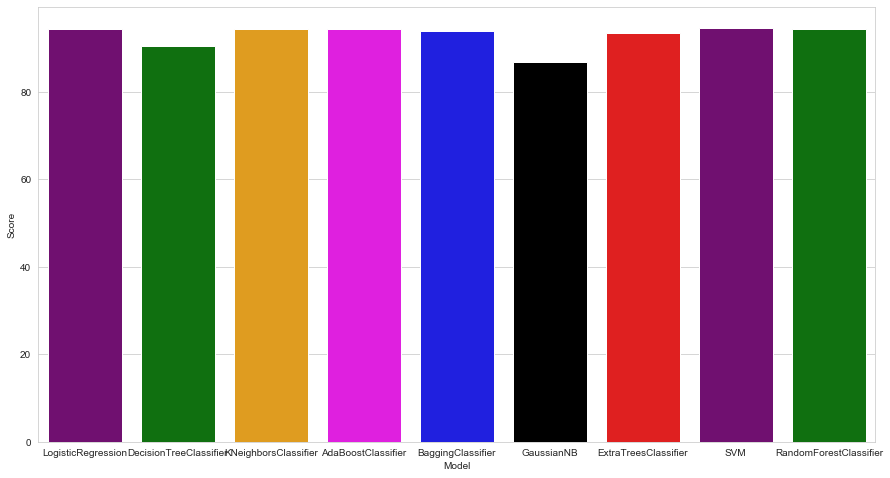

In [56]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [57]:
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21   0.0               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1

In [58]:
import sklearn.cluster as cluster

In [59]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['age','hypertension']])

In [60]:
kmns.cluster_centers_

array([[7.55759346e+01, 2.47663551e-01],
       [2.67938639e+01, 1.82166826e-02],
       [4.37700855e+01, 7.52136752e-02],
       [8.56074766e+00, 1.16822430e-03],
       [5.88270042e+01, 1.50210970e-01]])

In [61]:
df['age','hypertension']=kmns.labels_

In [62]:
from sklearn.cluster import KMeans 

In [63]:
k_range=range(1,15)
wss=[]

In [64]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','hypertension']])
    wss.append(km.inertia_)

In [65]:
wss

[2612843.5913581215,
 736976.2241953092,
 338757.6754036141,
 185141.21334481158,
 117532.86319286154,
 80999.15874374317,
 58080.26046471401,
 44747.97363140759,
 34894.5483324804,
 28415.856984154205,
 23662.94105039702,
 19373.062913063357,
 17532.052770667367,
 14779.38091949306]

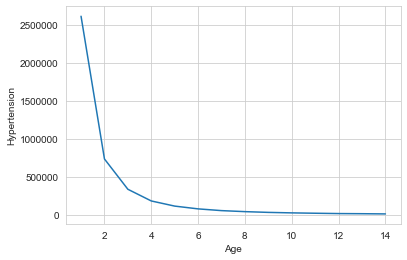

In [66]:
plt.xlabel('Age')
plt.ylabel('Hypertension')
plt.plot(k_range,wss)

In [67]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['age','heart_disease']])

In [68]:
kmns.cluster_centers_

array([[7.51116022e+01, 1.90055249e-01],
       [2.67938639e+01, 1.91754554e-03],
       [4.37700855e+01, 1.62393162e-02],
       [8.56074766e+00, 1.16822430e-03],
       [5.84744718e+01, 7.21830986e-02]])

In [69]:
df['age by heart_disease']=kmns.labels_

In [70]:
k_range=range(1,13)
wss=[]

In [71]:
for k in k_range:
    KM=KMeans(n_clusters=k)
    km.fit(df[['age','heart_disease']])
    wss.append(km.inertia_)

In [72]:
wss

[14562.085023690437,
 14306.673373649459,
 14876.347028145583,
 14374.856204582029,
 14666.313749914583,
 14699.975308118414,
 14425.376039572013,
 14710.592110865648,
 14985.302900631392,
 14652.875694984225,
 14749.186789391868,
 14705.946276606084]

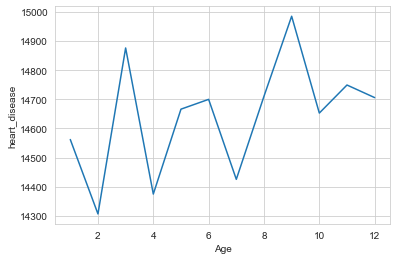

In [73]:
plt.xlabel('Age')
plt.ylabel('heart_disease')
plt.plot(k_range,wss)

In [75]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['age','smoking_status']])

In [76]:
kmns.cluster_centers_

array([[43.77008547,  1.63846154],
       [ 9.1790393 ,  0.43668122],
       [75.57593458,  1.44392523],
       [58.82700422,  1.56962025],
       [27.33062055,  1.65106816]])

In [78]:
df['Age by smoking_status']=kmns.labels_

In [81]:
k_range=range(1,7)
WSS=[]

In [84]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','smoking_status']])
    wss.append(km.inertia_)

In [85]:
wss

[14562.085023690437,
 14306.673373649459,
 14876.347028145583,
 14374.856204582029,
 14666.313749914583,
 14699.975308118414,
 14425.376039572013,
 14710.592110865648,
 14985.302900631392,
 14652.875694984225,
 14749.186789391868,
 14705.946276606084,
 2618260.199577299,
 742223.3677685279,
 343667.0317974137,
 190139.6917059343,
 121960.63882519383,
 85984.67936721382]

In [87]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['age','bmi']])

In [88]:
kmns.cluster_centers_

array([[52.98631922, 32.02612378],
       [11.02609506, 20.73289842],
       [60.48502994,  0.36586826],
       [32.44342508, 30.77423547],
       [73.20934761, 29.3248296 ]])

In [89]:
df['Age by bmi']=kmns.labels_

In [90]:
k_range=range(1,15)
wss=[]

In [93]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','bmi']])
    wss.append(km.inertia_)

In [94]:
wss

[3076349.147853229,
 1182924.0167354757,
 749912.3312671185,
 583063.512297508,
 472020.4840732373,
 392983.9167662104,
 328237.98476288136,
 292851.94402569404,
 259914.6308625646,
 229527.42055068968,
 208458.80081562581,
 191011.20341946106,
 177480.73931834777,
 164129.3189494616]

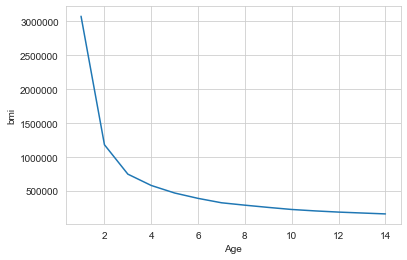

In [95]:
plt.xlabel('Age')
plt.ylabel('bmi')
plt.plot(k_range,wss)

In [102]:
df2=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/healthcare-dataset-stroke-data.csv')
df2.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [103]:
object_col=[]
num_col=[]
for i in df2.columns:
    if df2[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [104]:
object_col

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [105]:
num_col

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [106]:
df.columns

Index([               'gender',                   'age',
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke', ('age', 'hypertension'),
        'age by heart_disease', 'Age by Shucked Weight',
       'Age by smoking_status',            'Age by bmi'],
      dtype='object')

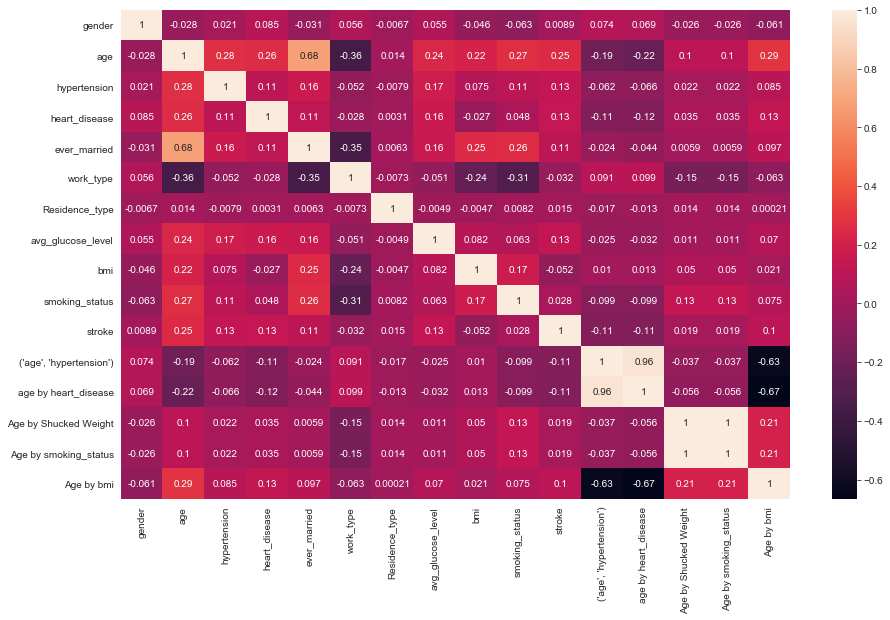

In [107]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

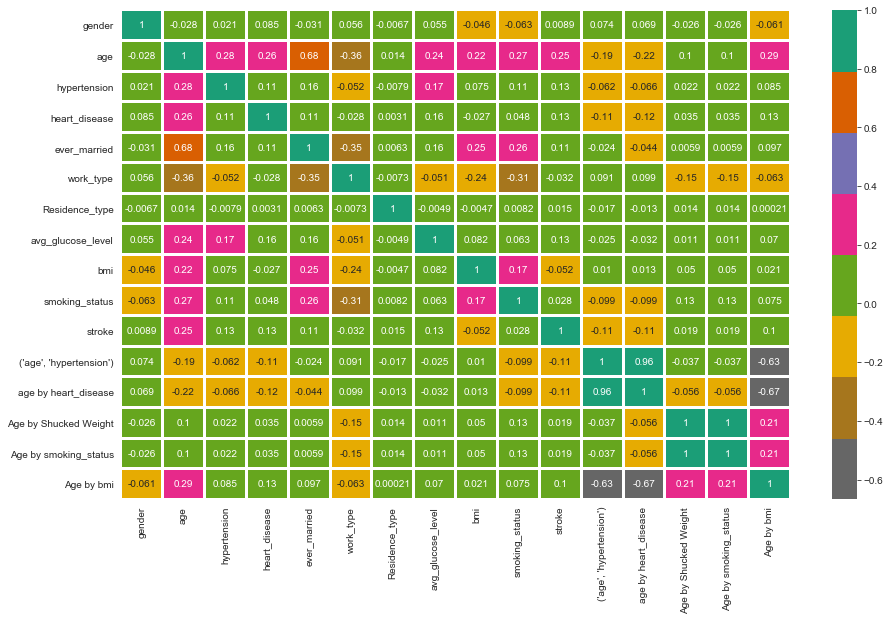

In [108]:
plt.figure(figsize=(15,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

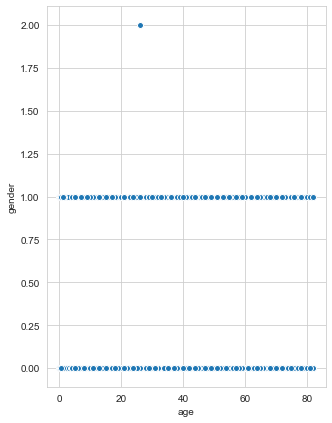

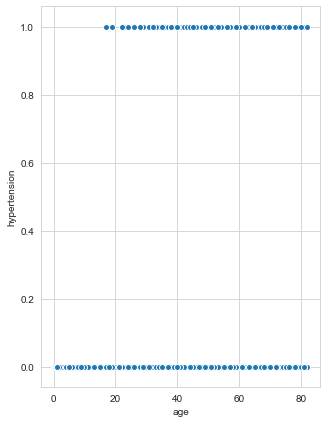

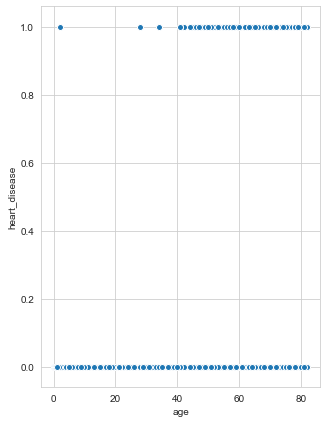

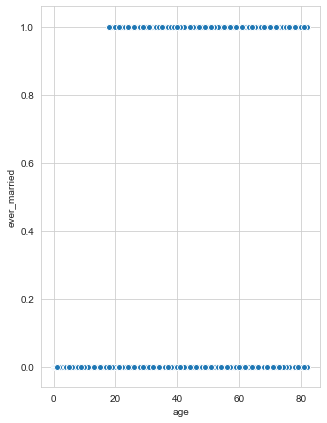

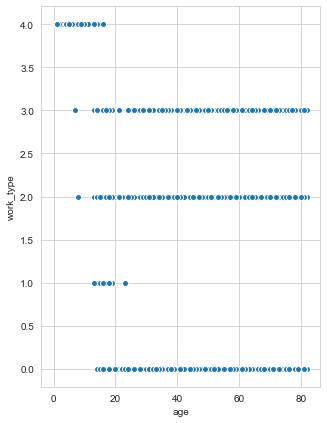

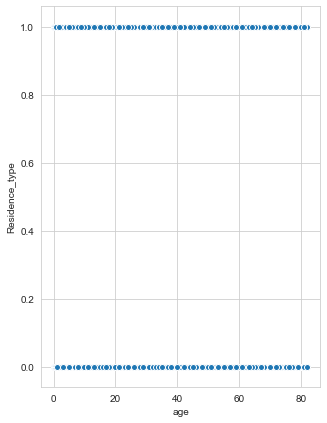

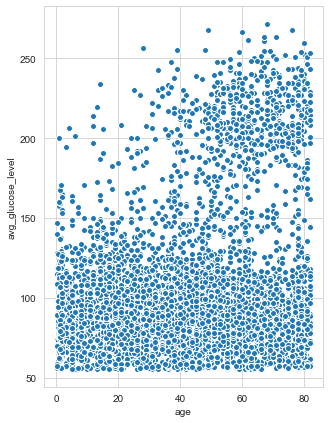

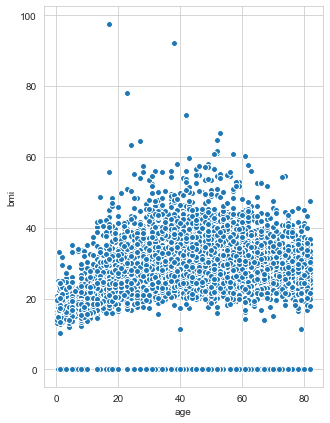

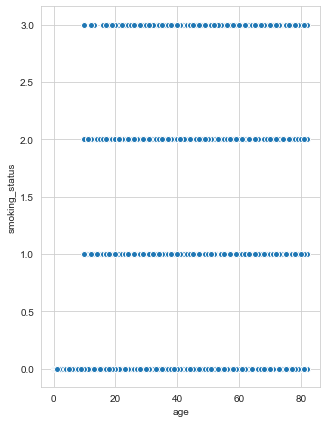

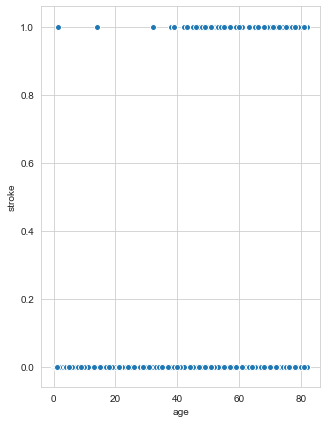

In [111]:
for i in ['gender',                   
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke']:
    plt.figure(figsize=(5,7))
    sns.scatterplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

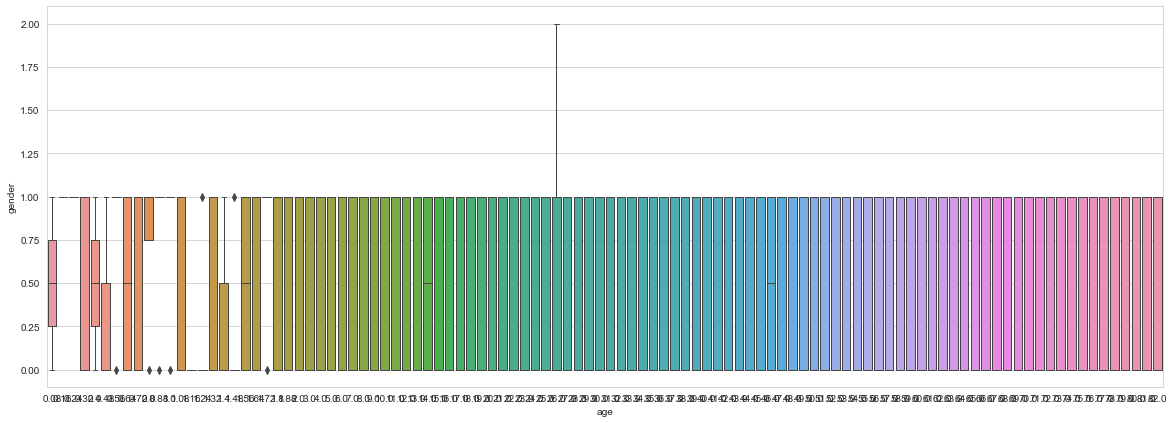

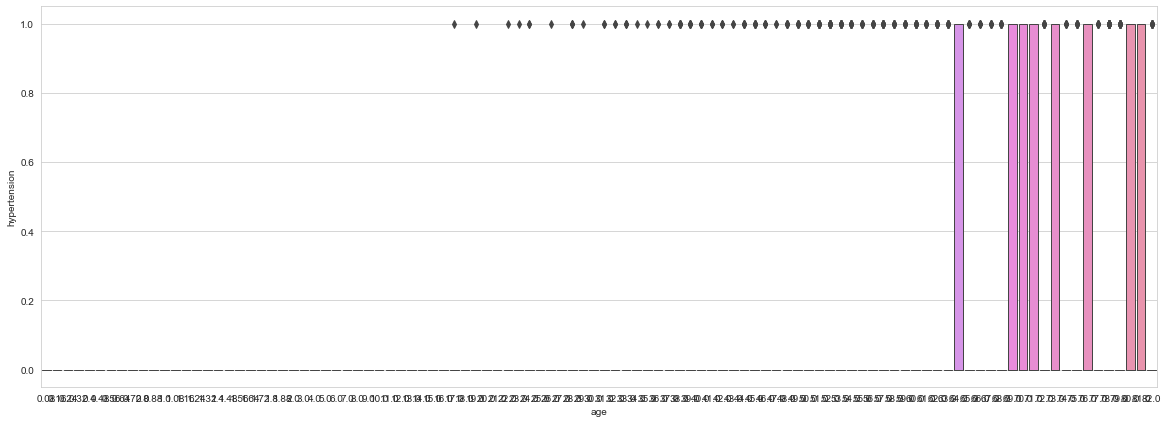

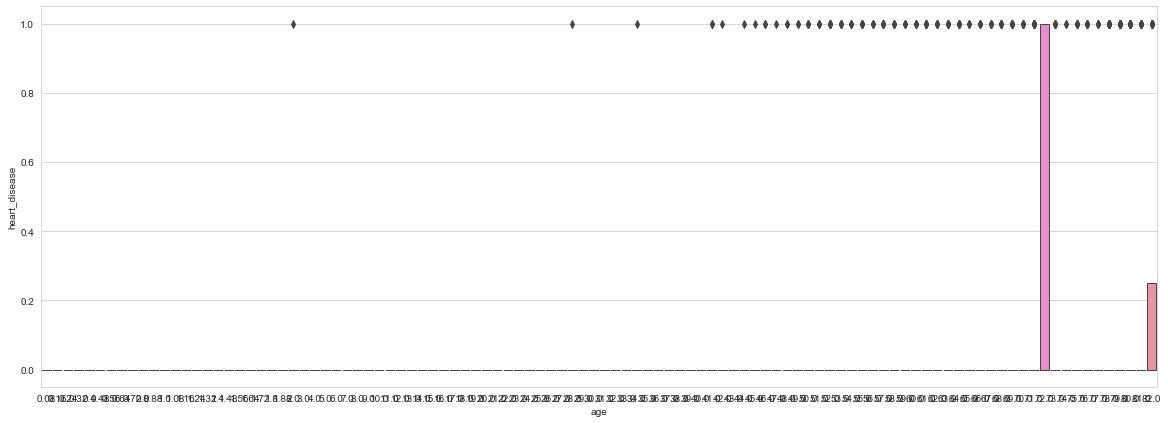

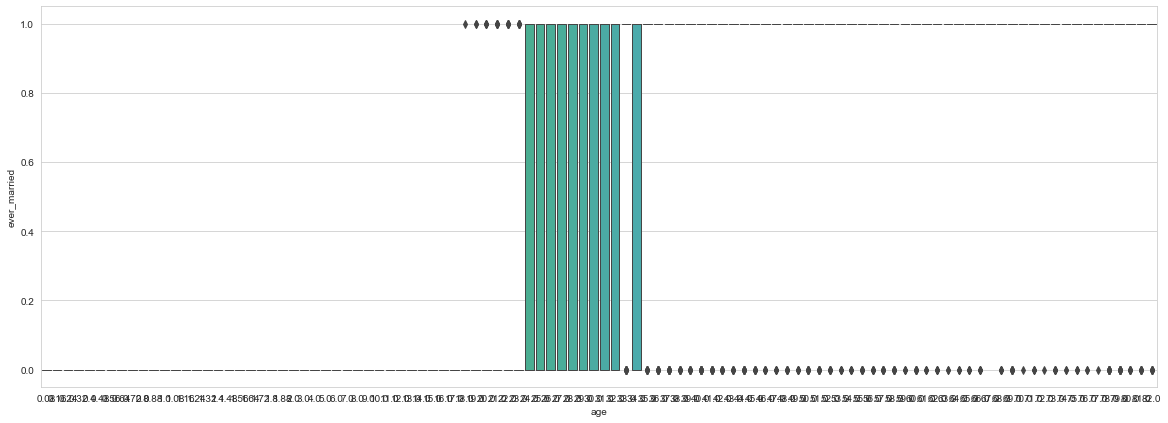

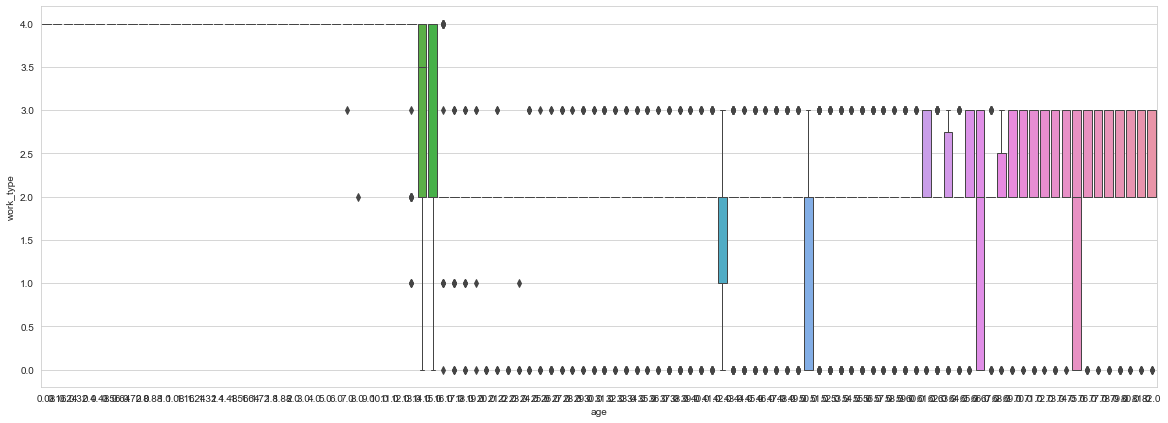

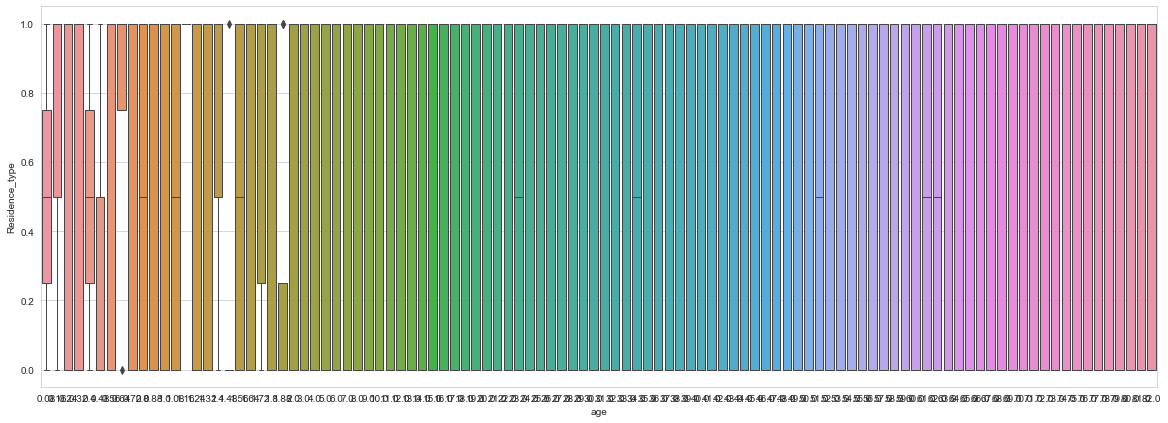

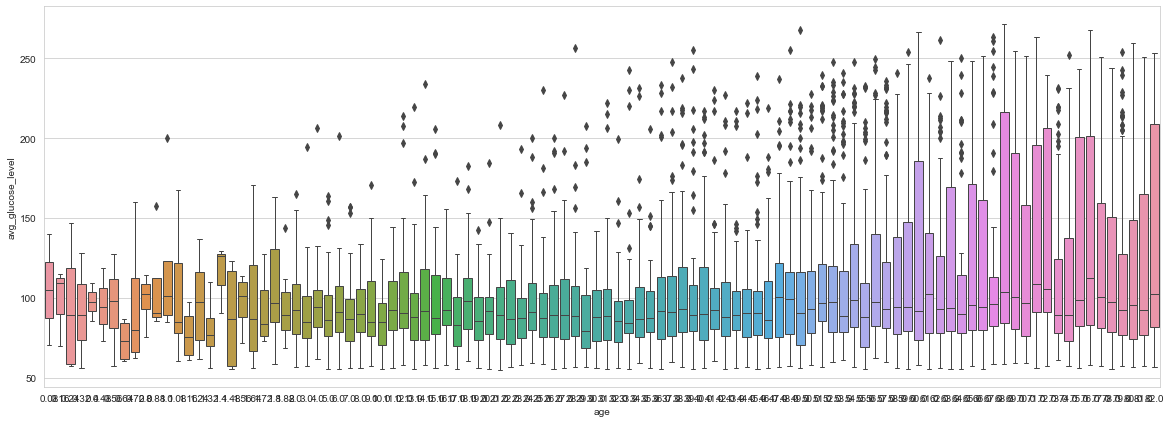

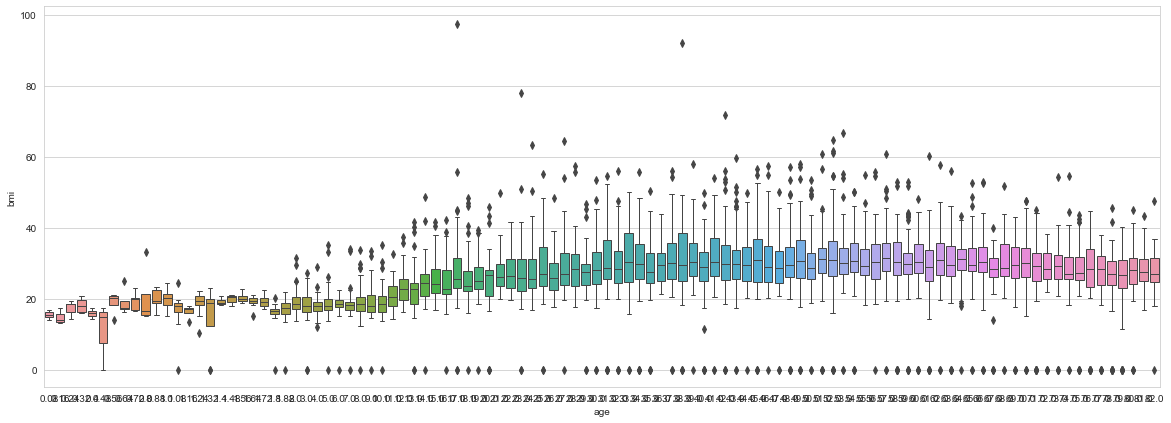

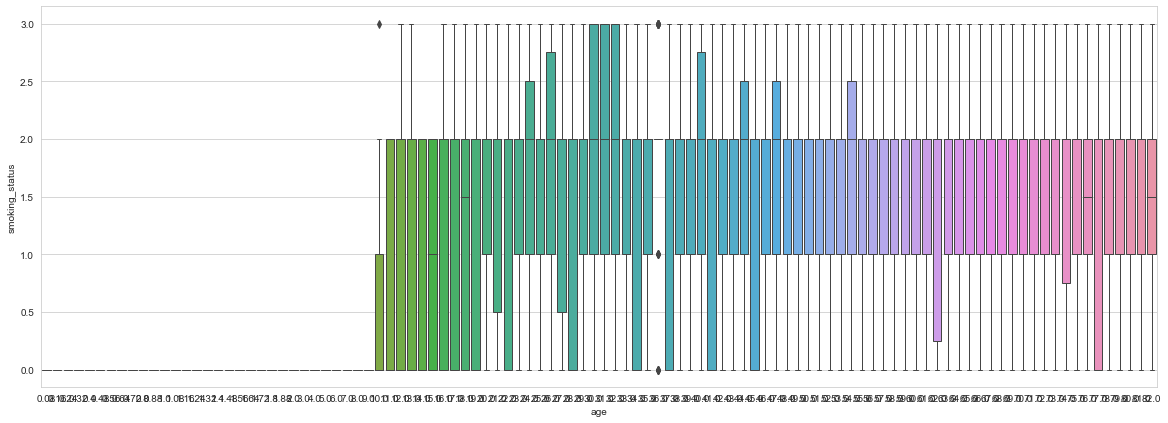

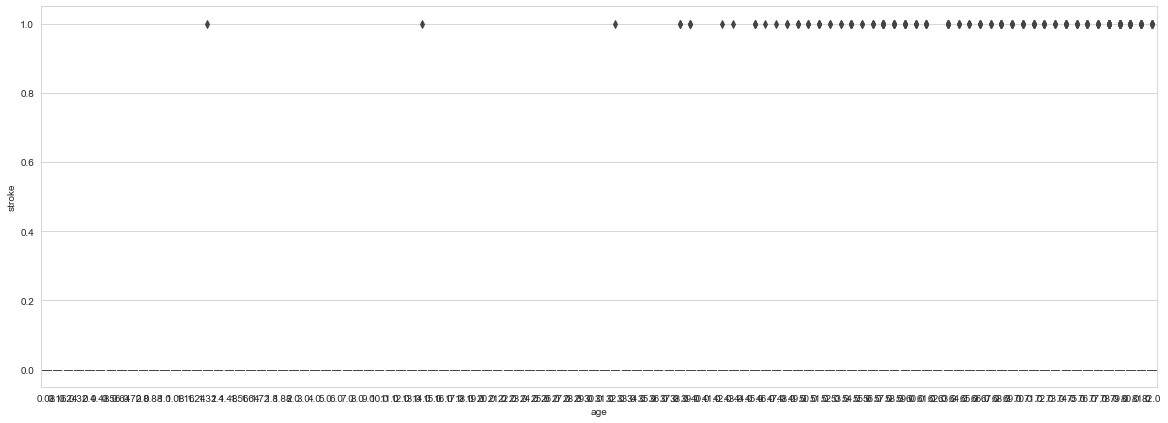

In [115]:
for i in ['gender',                   
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke']:
    plt.figure(figsize=(20,7))
    sns.boxplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

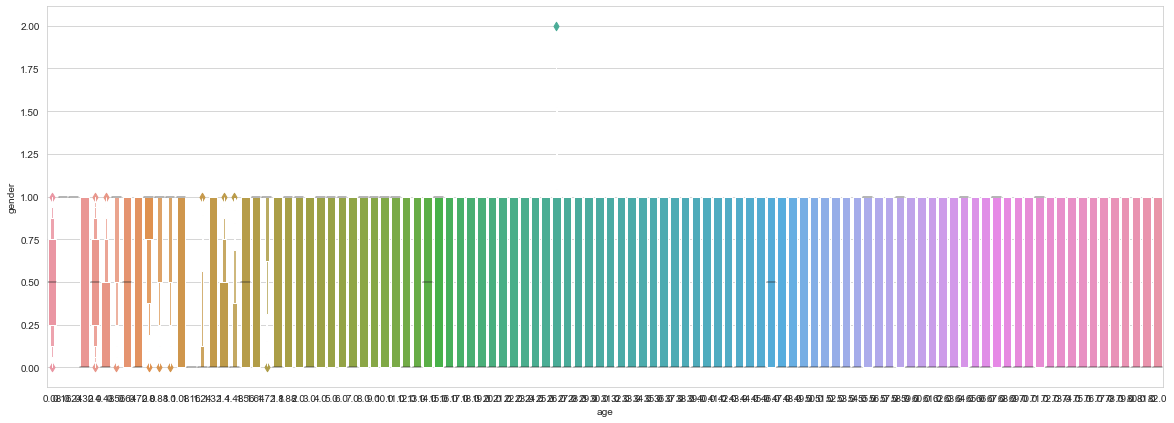

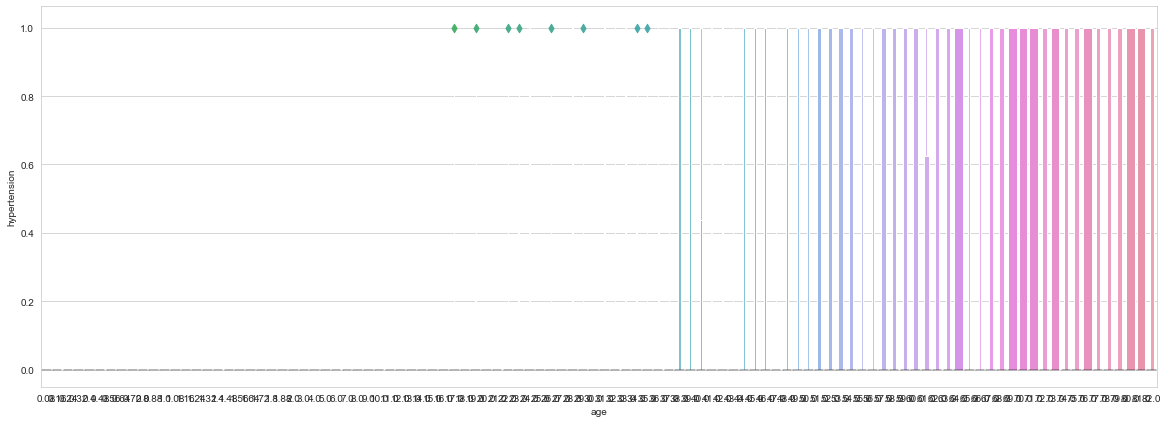

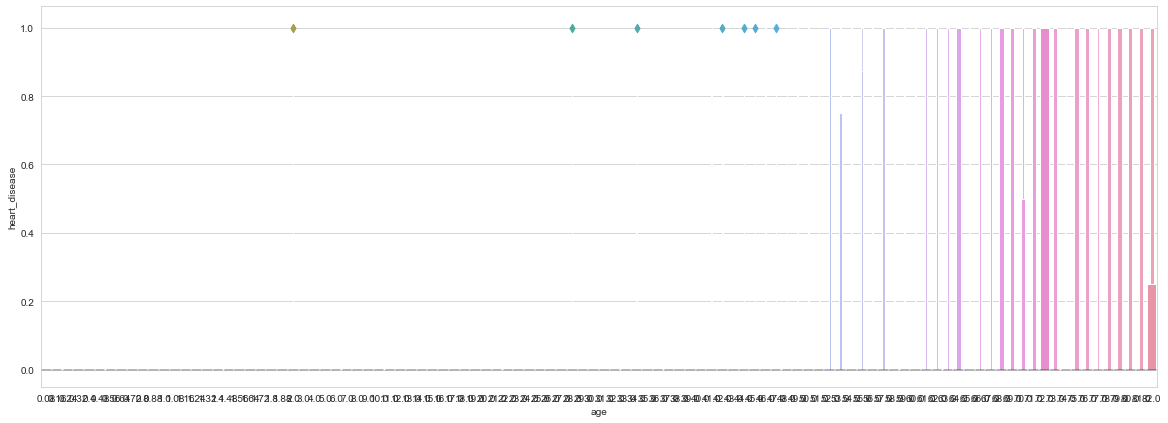

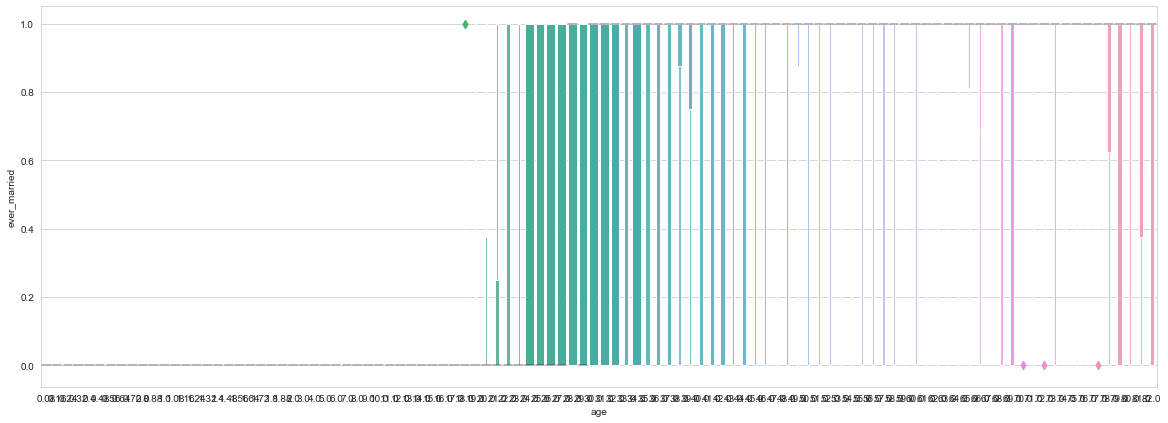

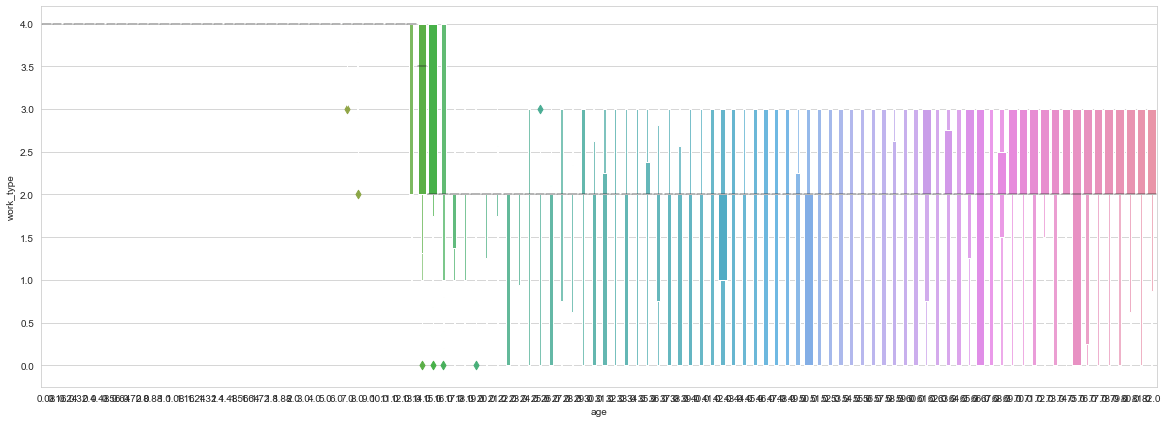

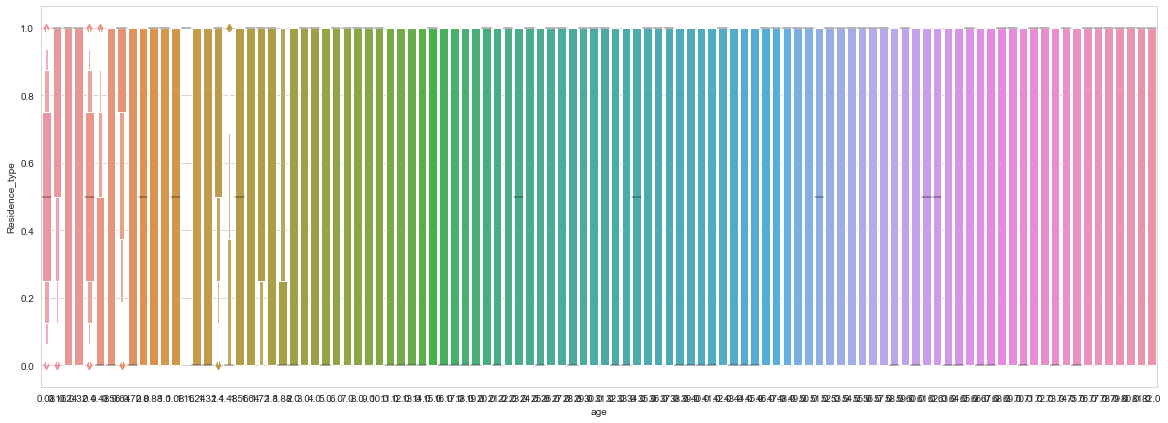

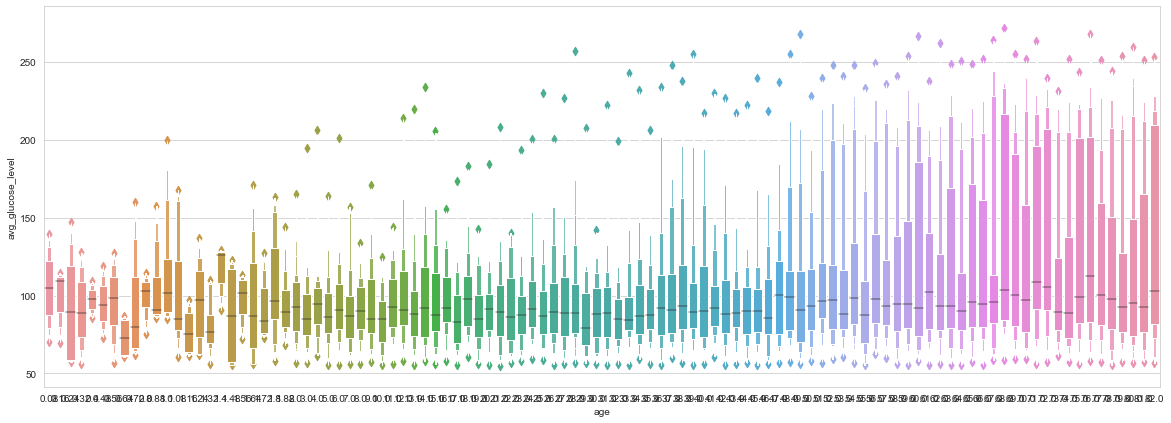

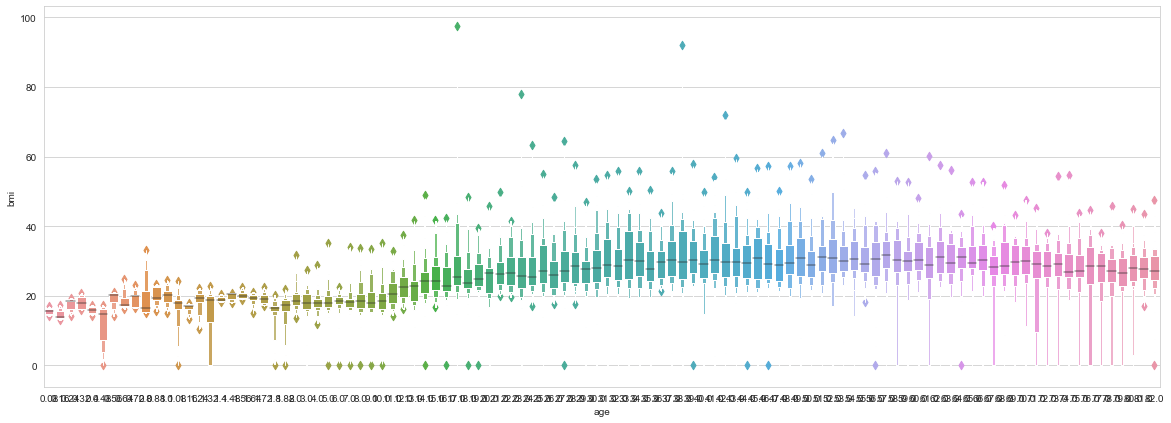

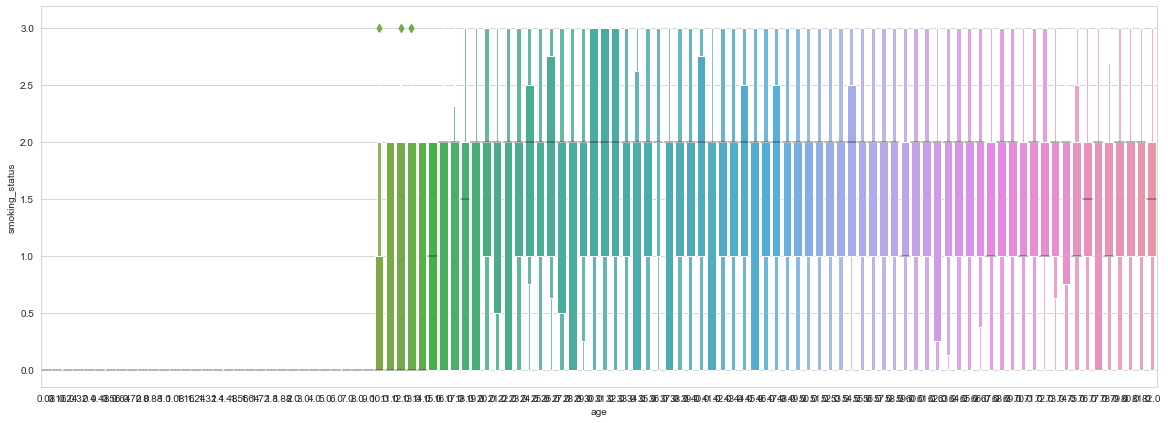

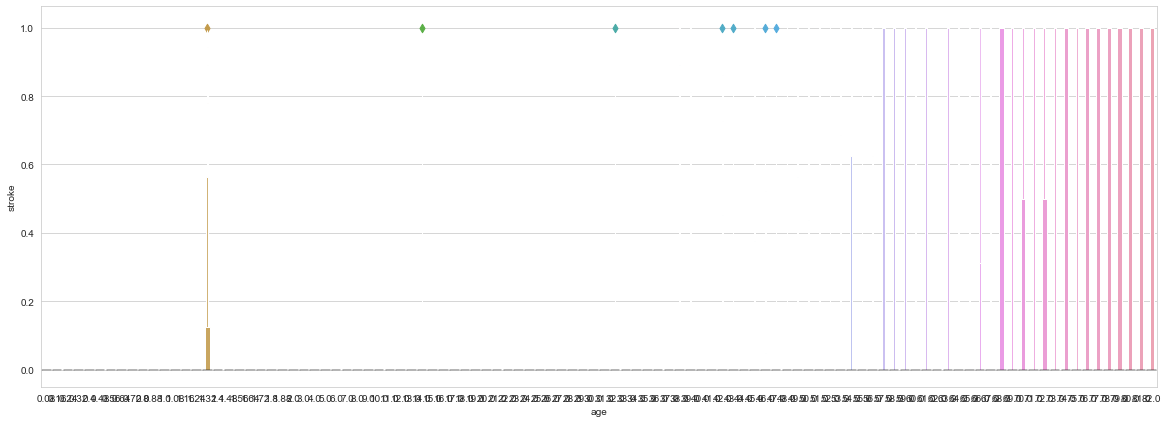

In [116]:
for i in ['gender',                   
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke']:
    plt.figure(figsize=(20,7))
    sns.boxenplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

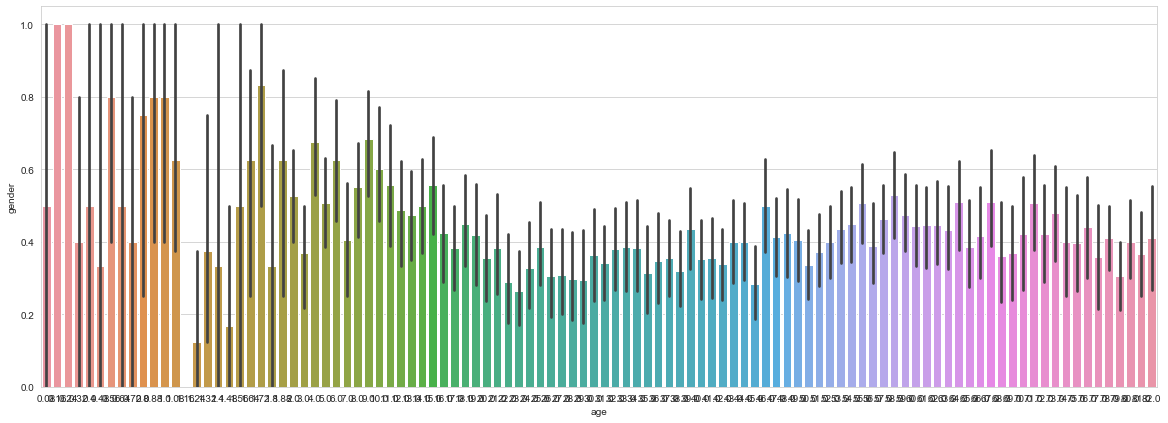

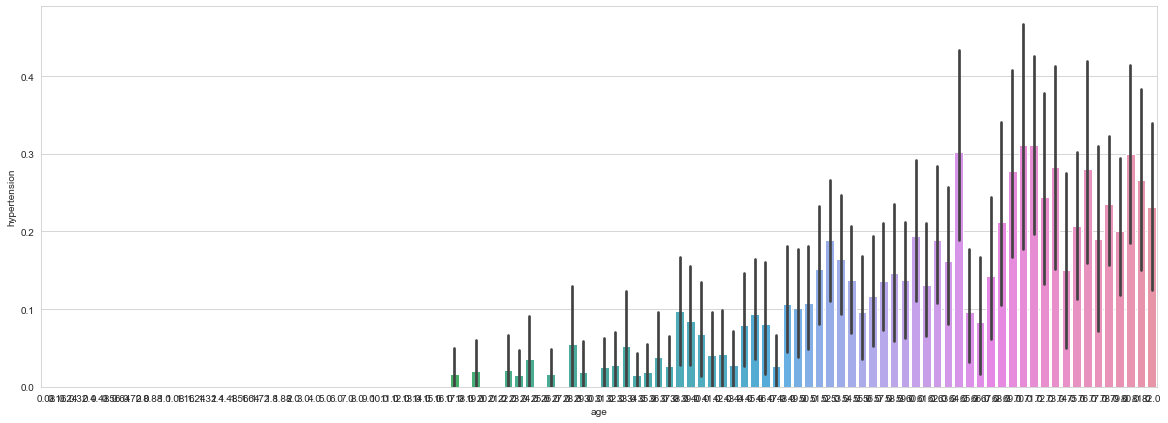

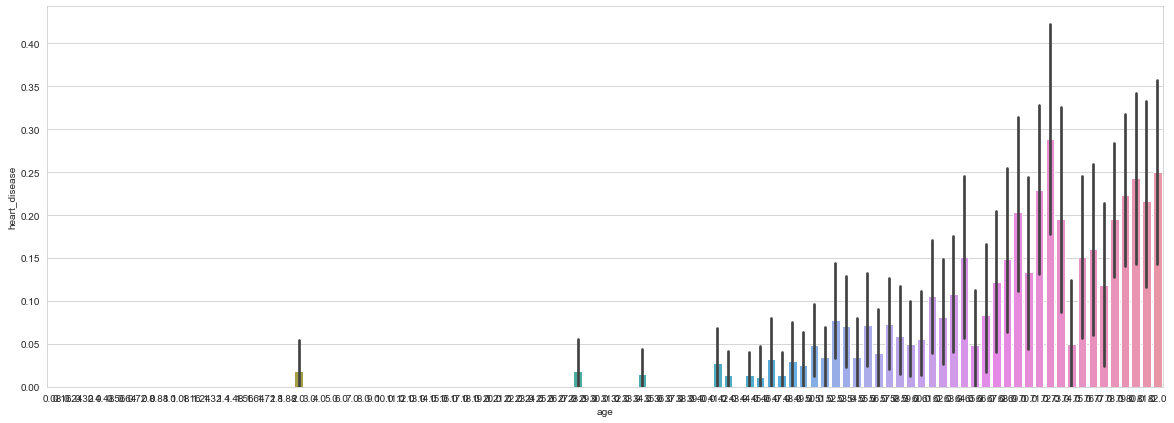

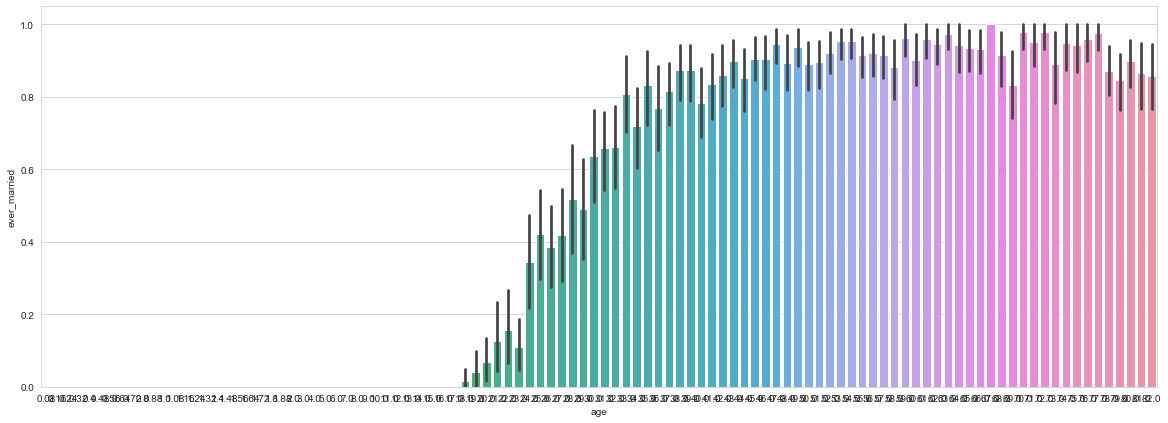

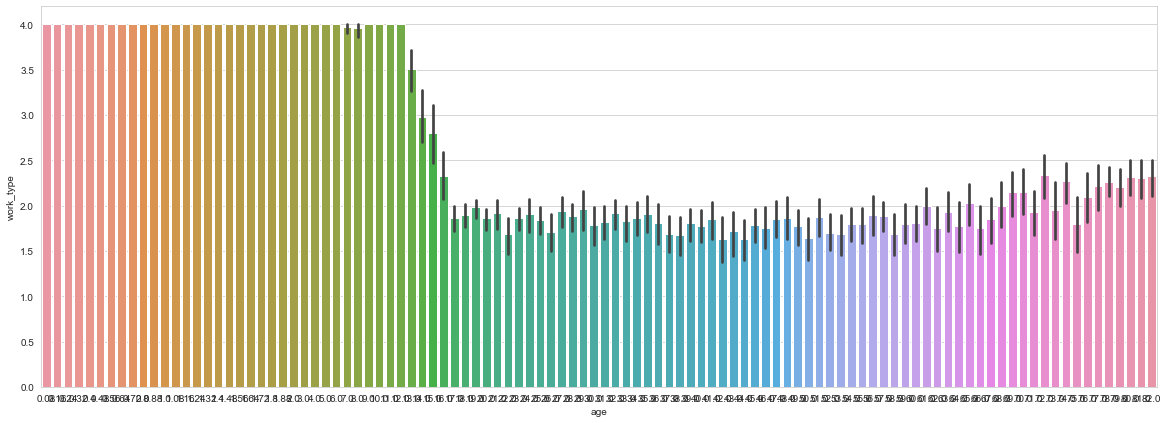

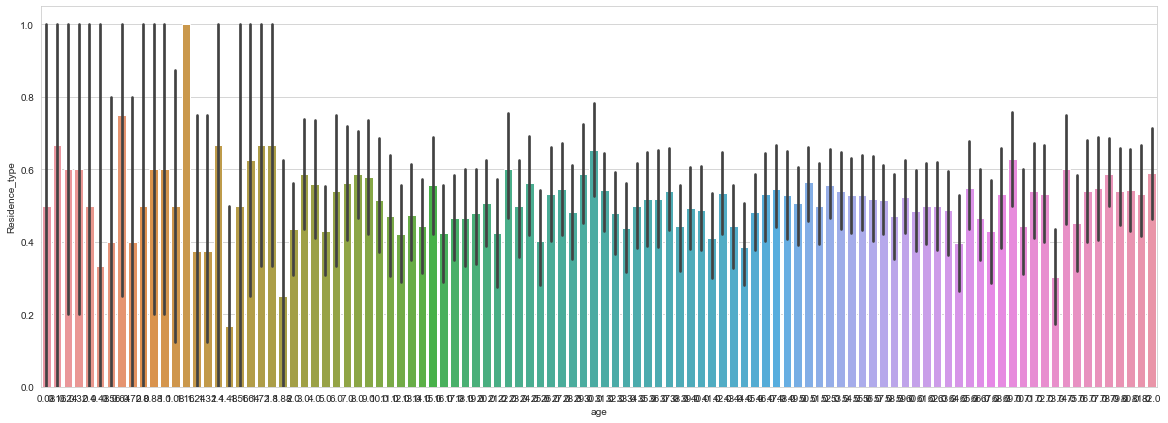

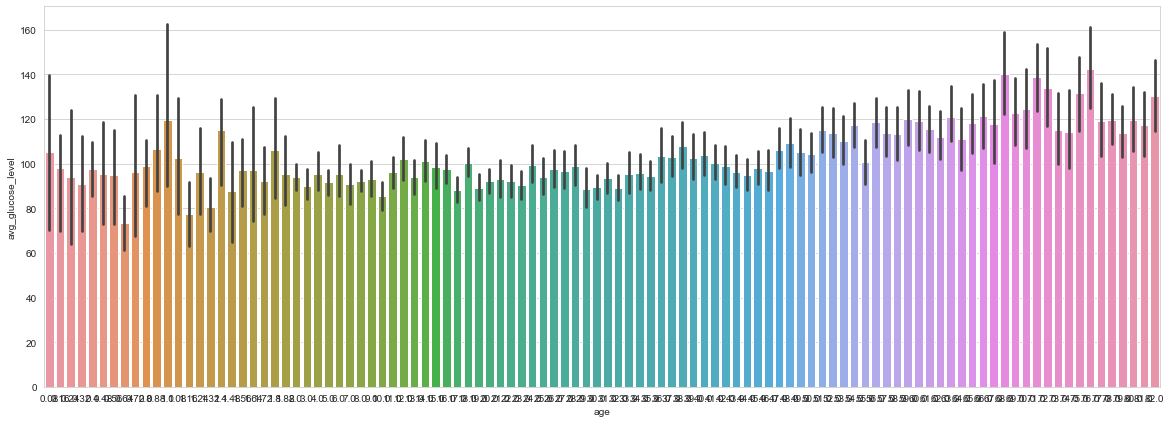

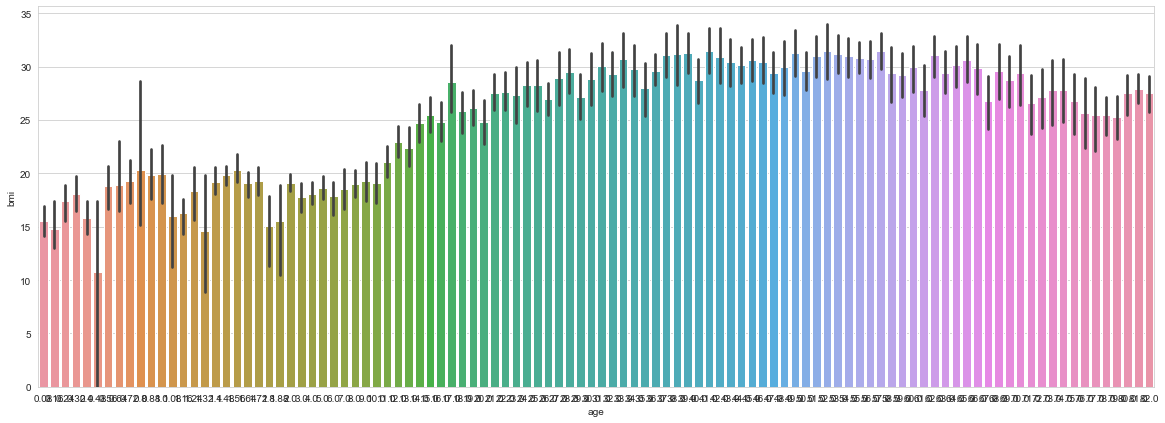

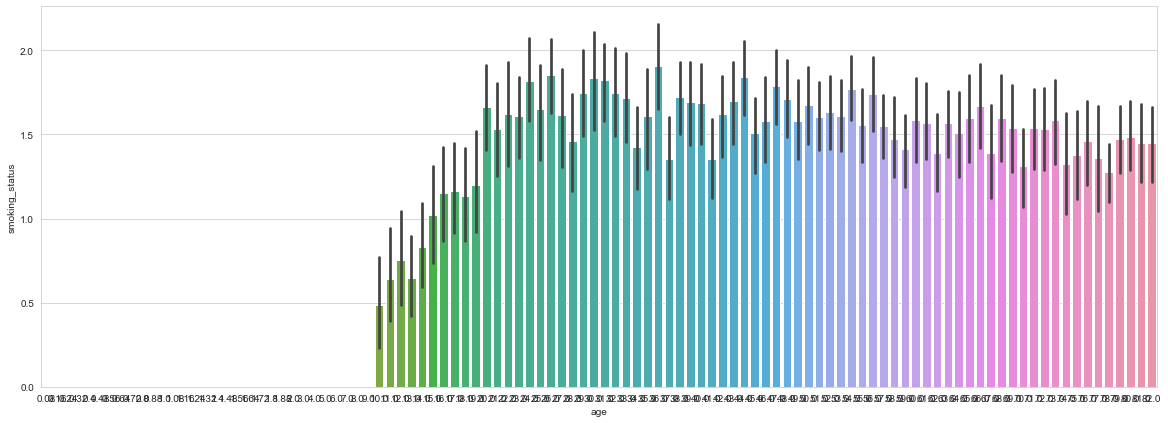

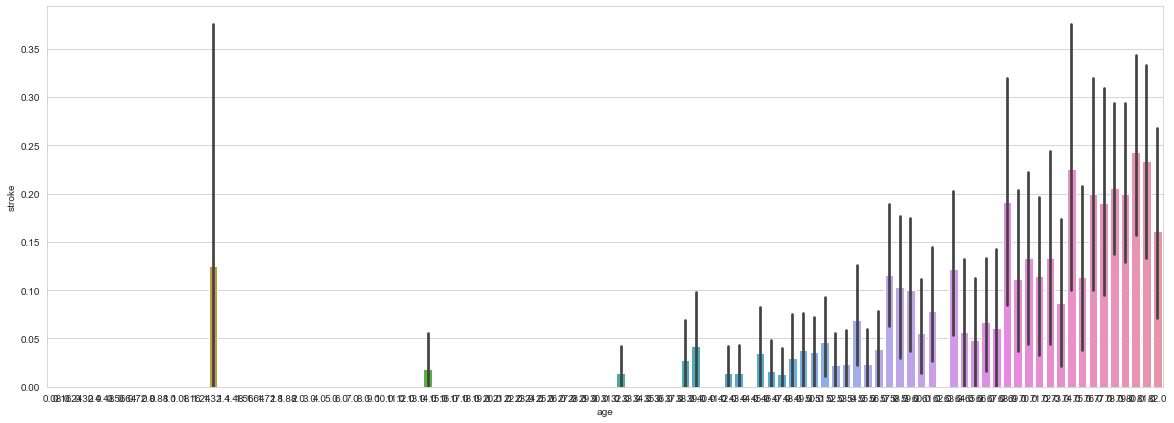

In [117]:
for i in ['gender',                   
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke']:
    plt.figure(figsize=(20,7))
    sns.barplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

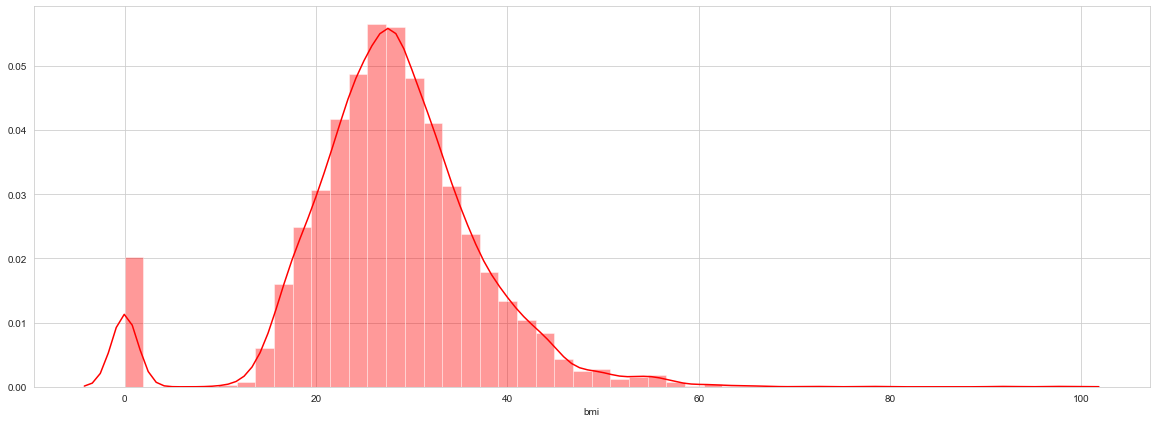

In [123]:
plt.figure(figsize=(20,7))
sns.distplot(df['bmi'],color='red')

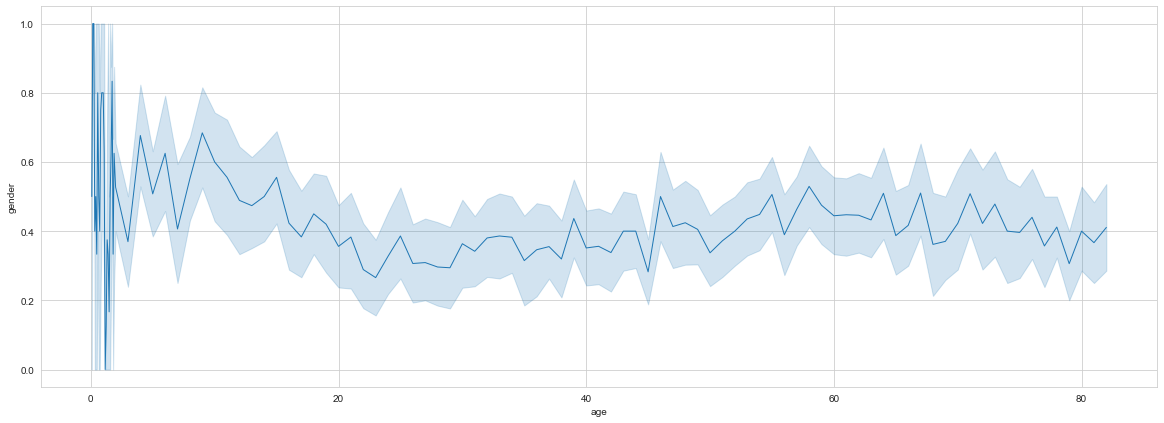

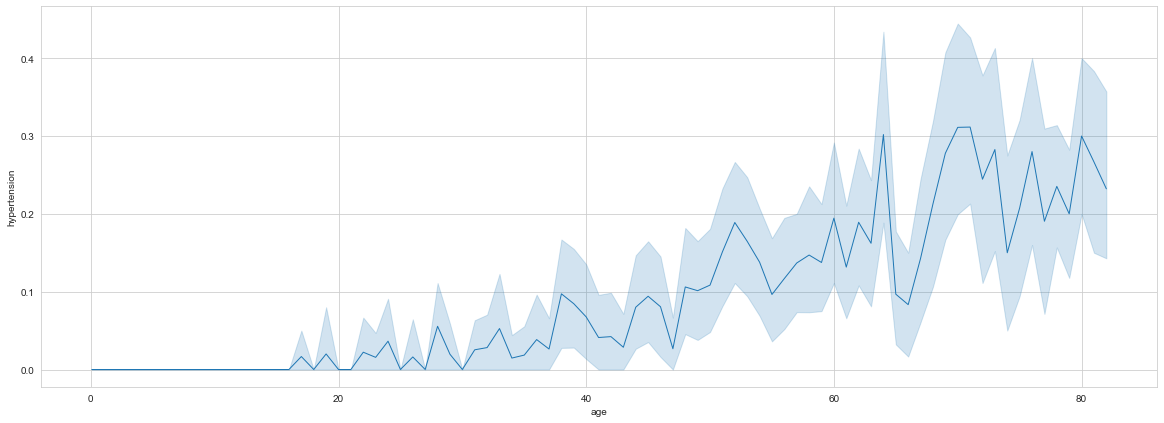

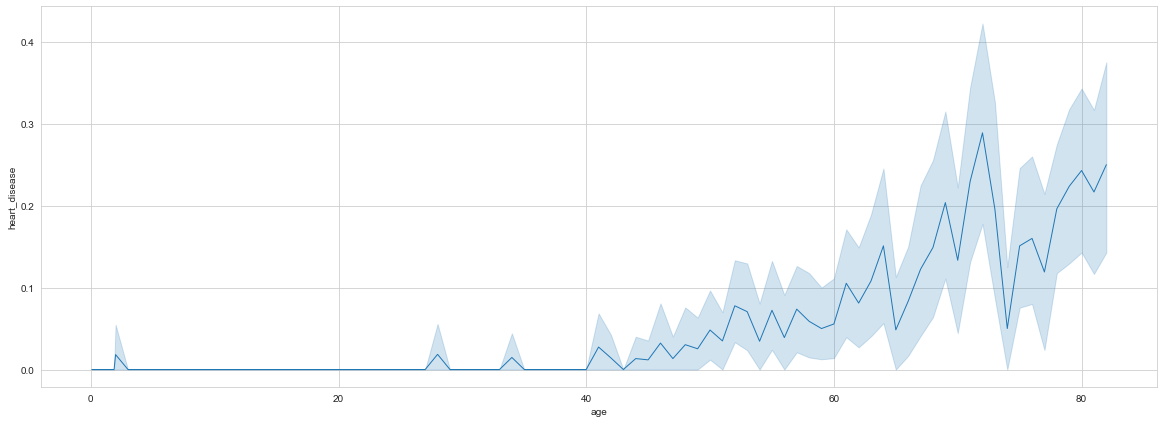

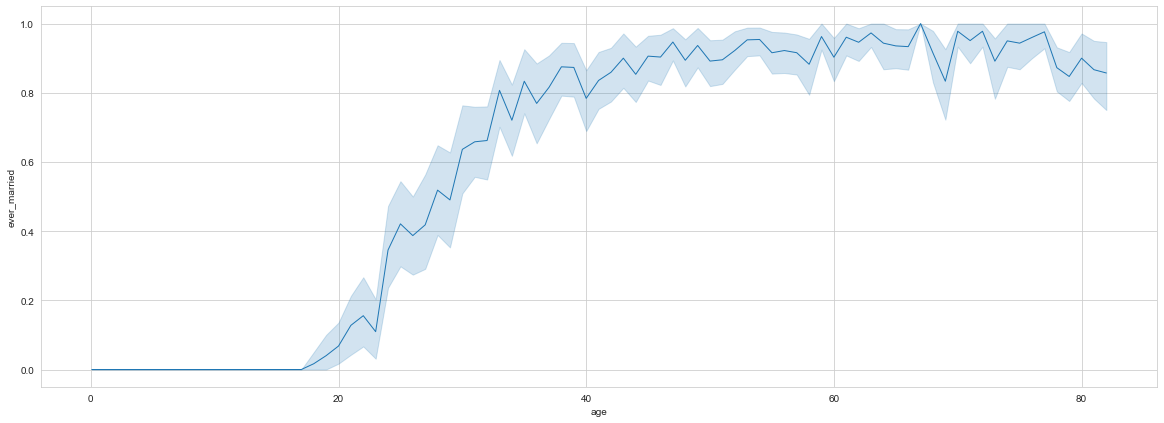

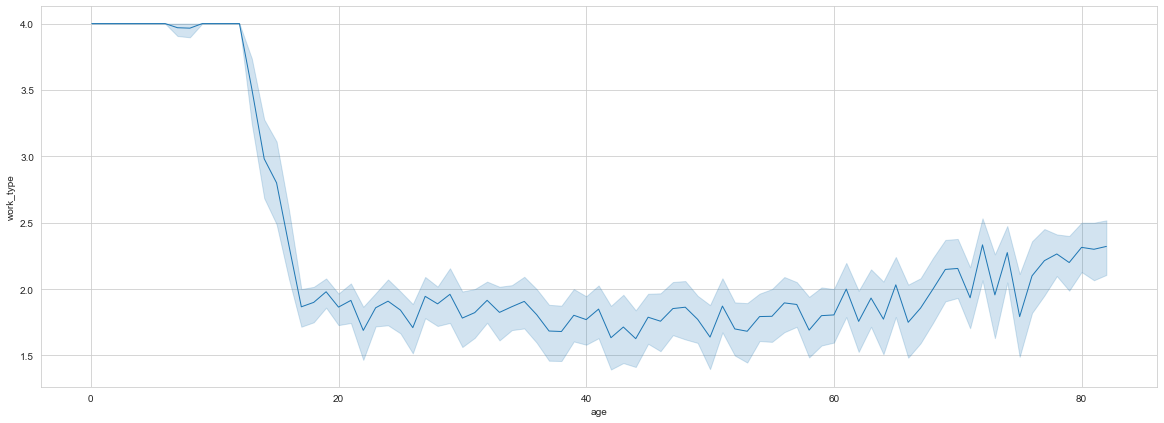

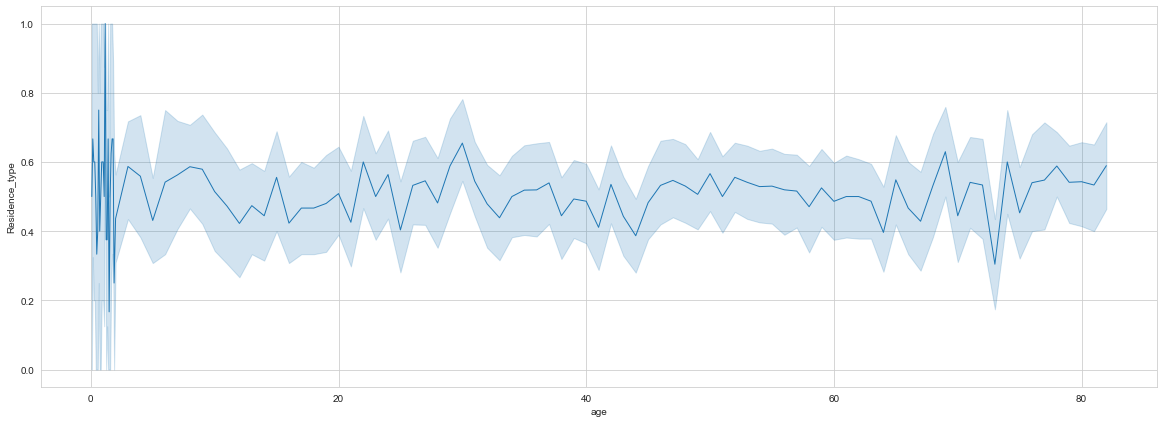

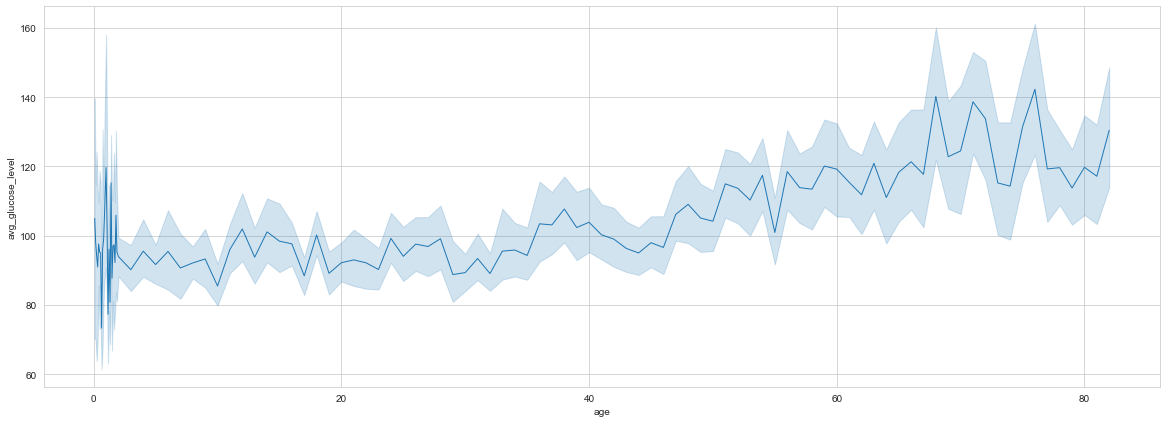

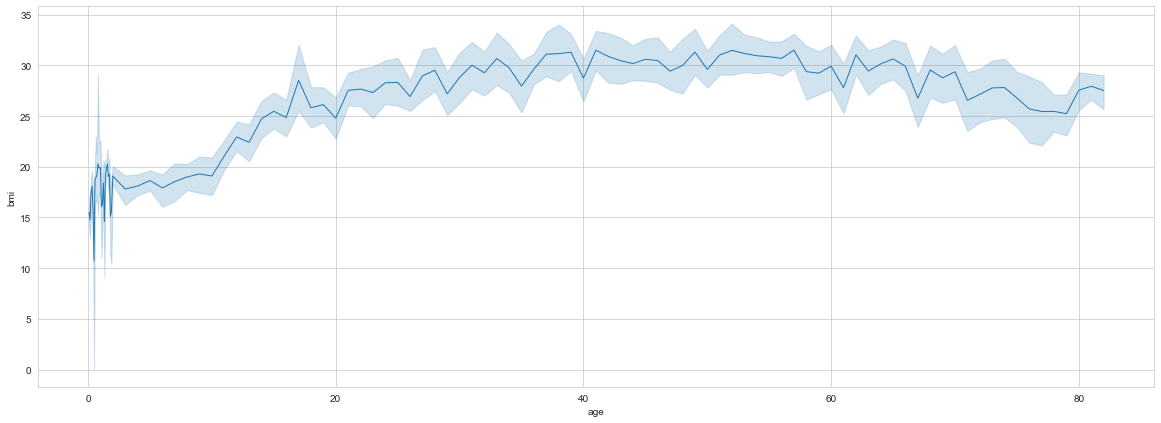

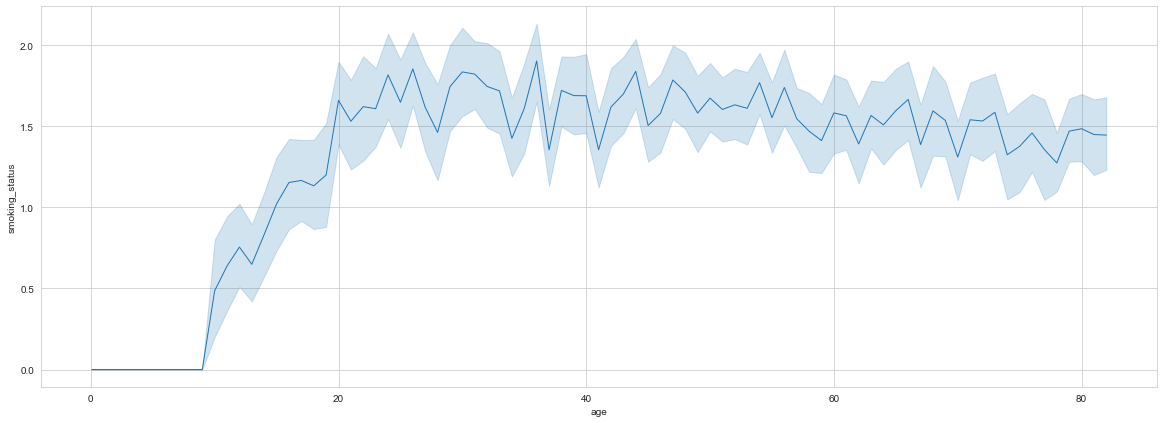

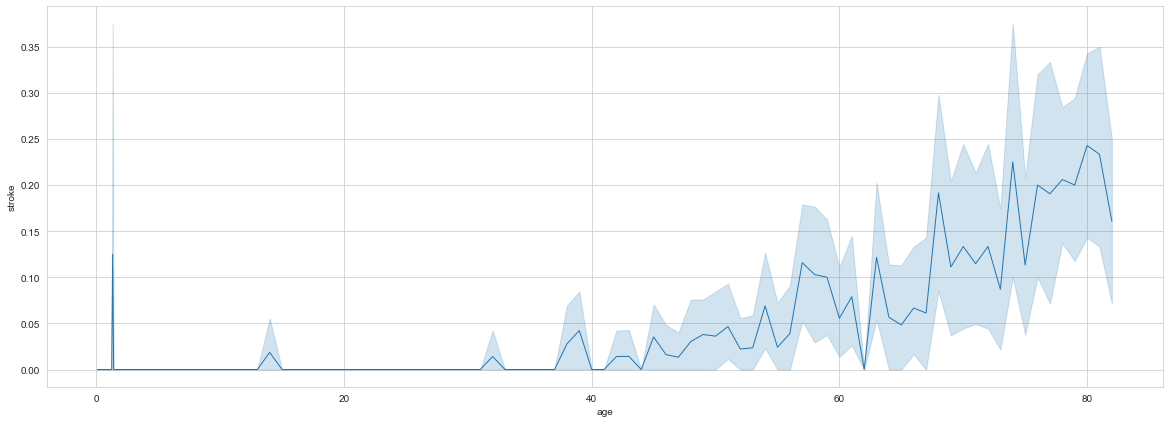

In [126]:
for i in ['gender',                   
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke']:
    plt.figure(figsize=(20,7))
    sns.lineplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


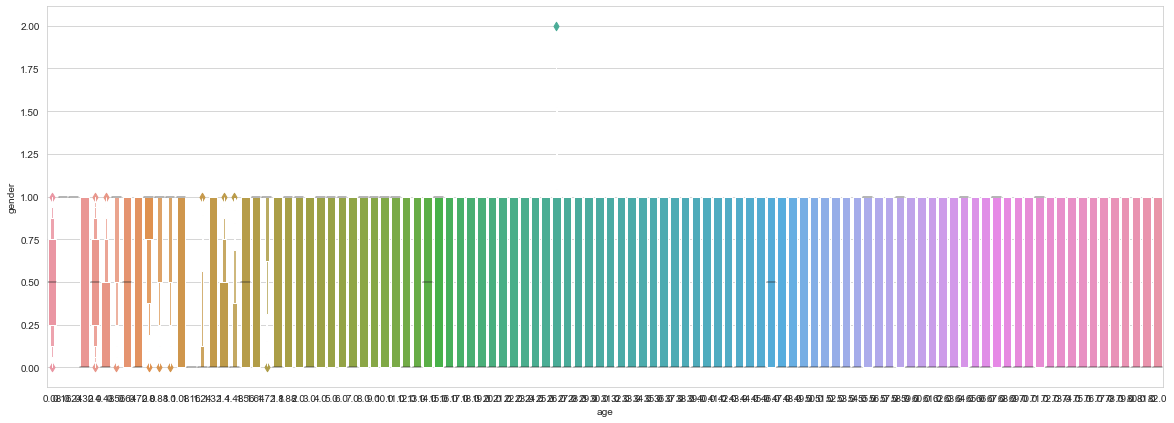

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


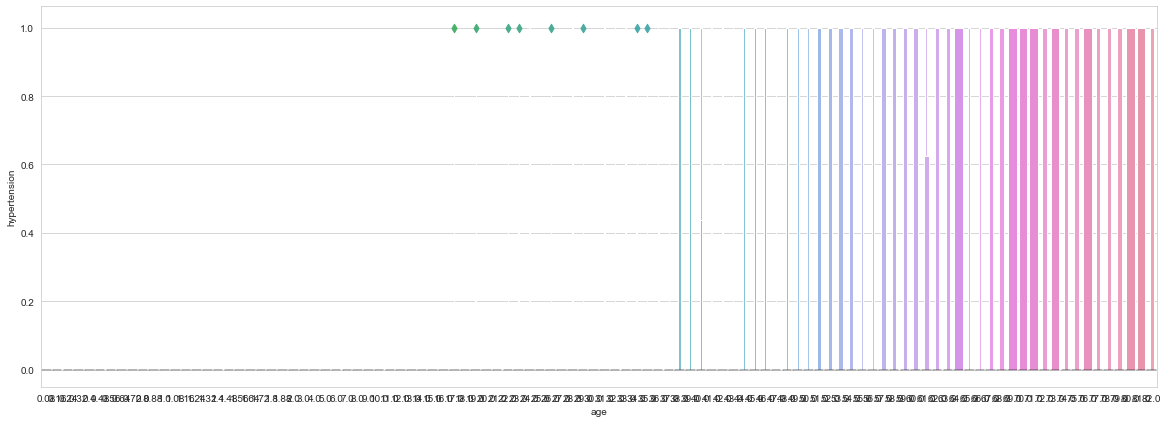

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


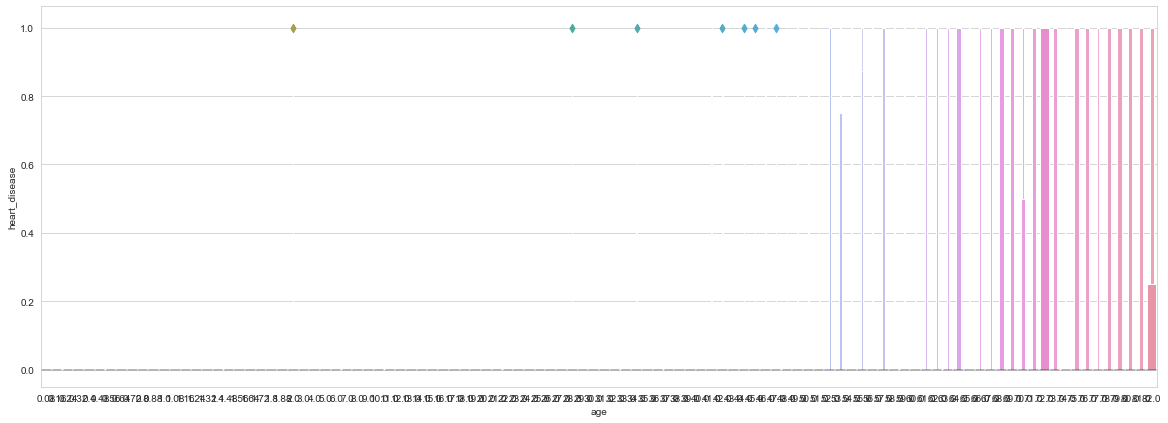

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


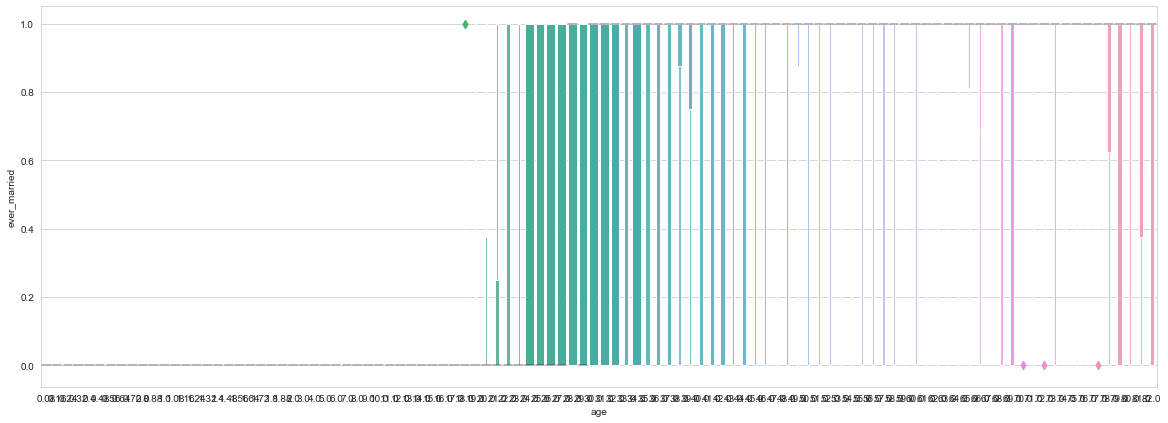

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


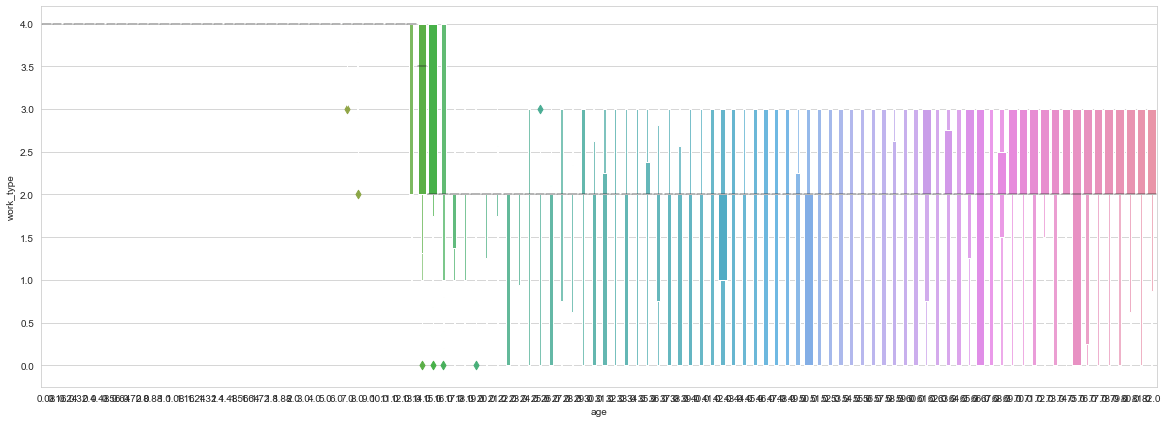

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


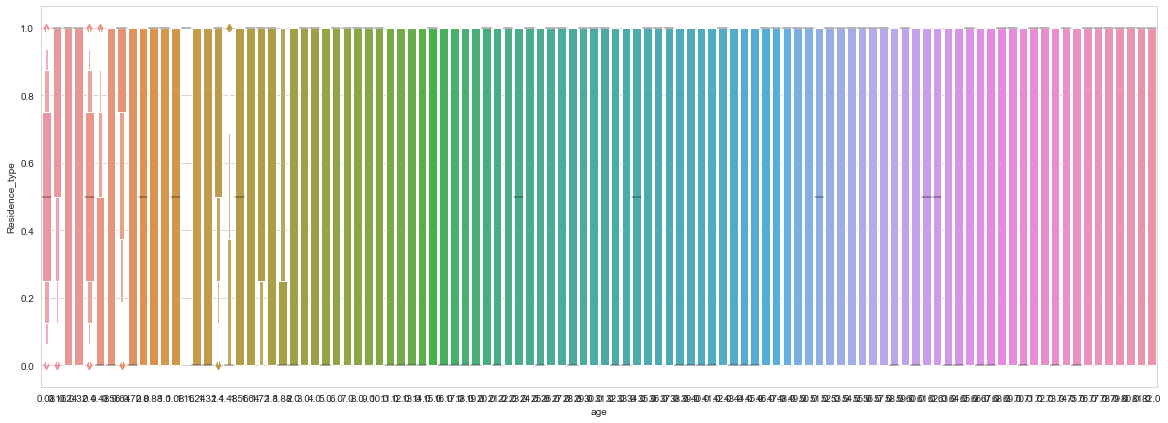

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


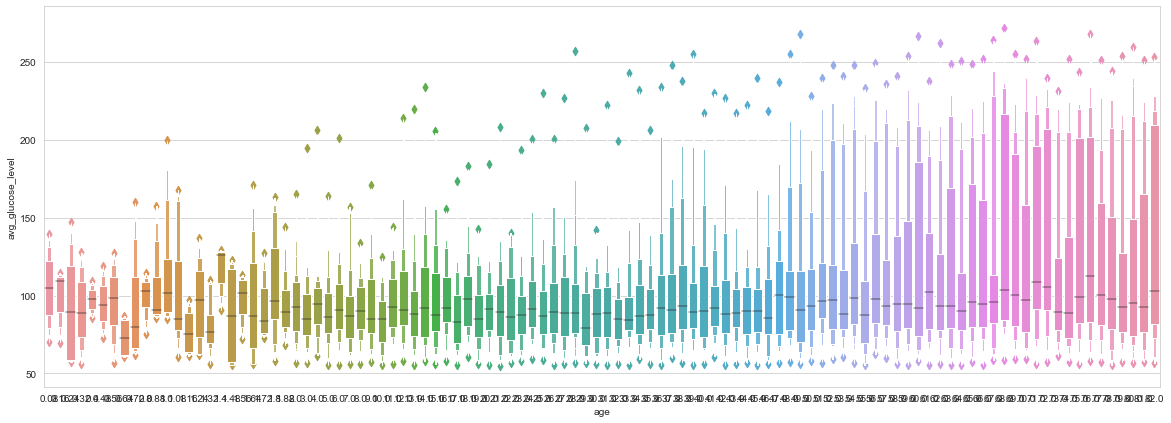

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


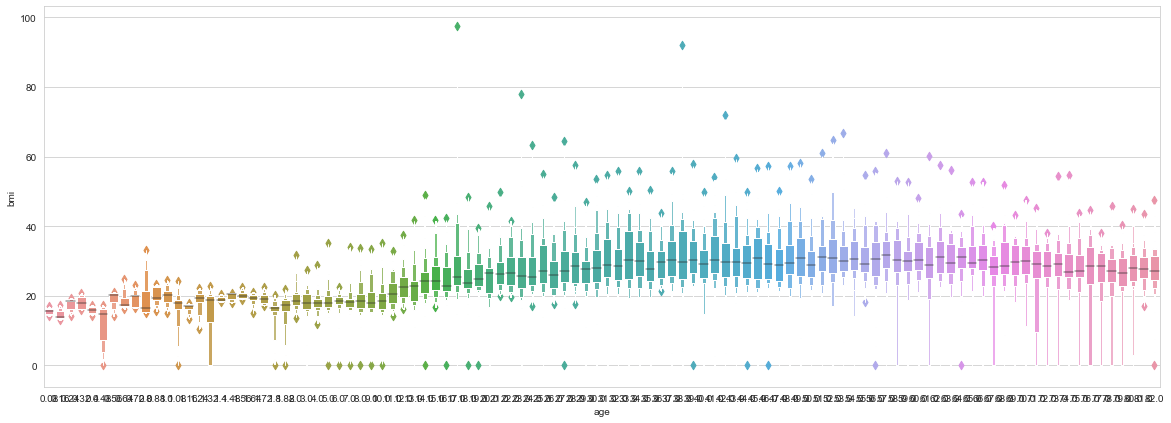

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


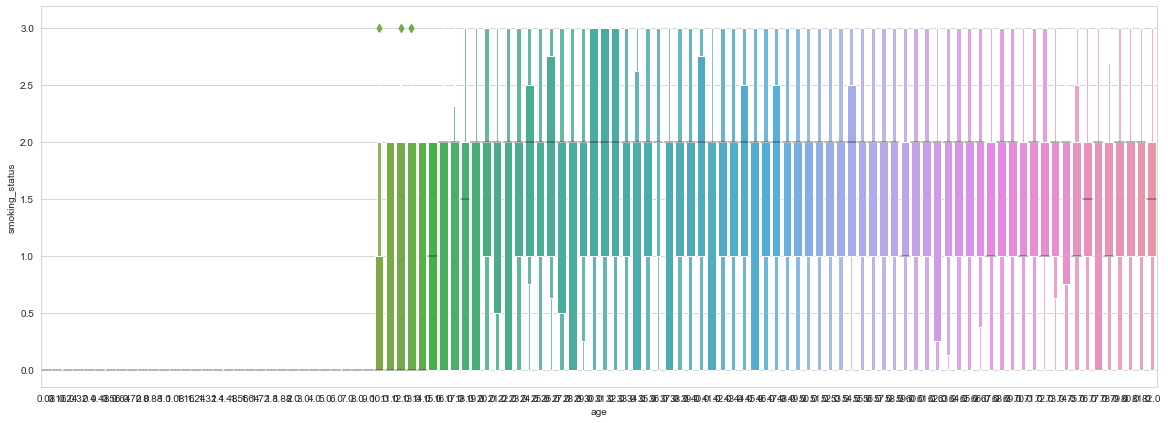

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


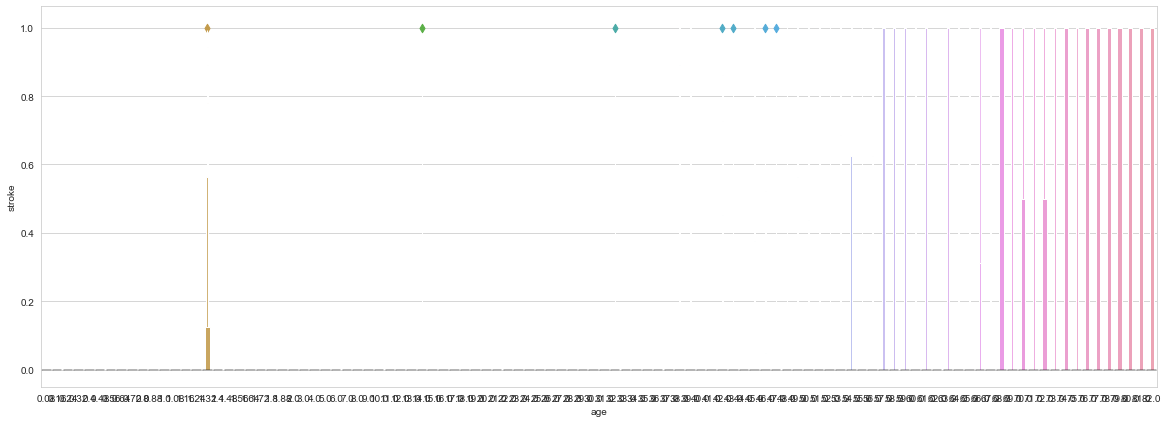

In [127]:
for i in ['gender',                   
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke']:
    plt.figure(figsize=(20,7))
    sns.lvplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

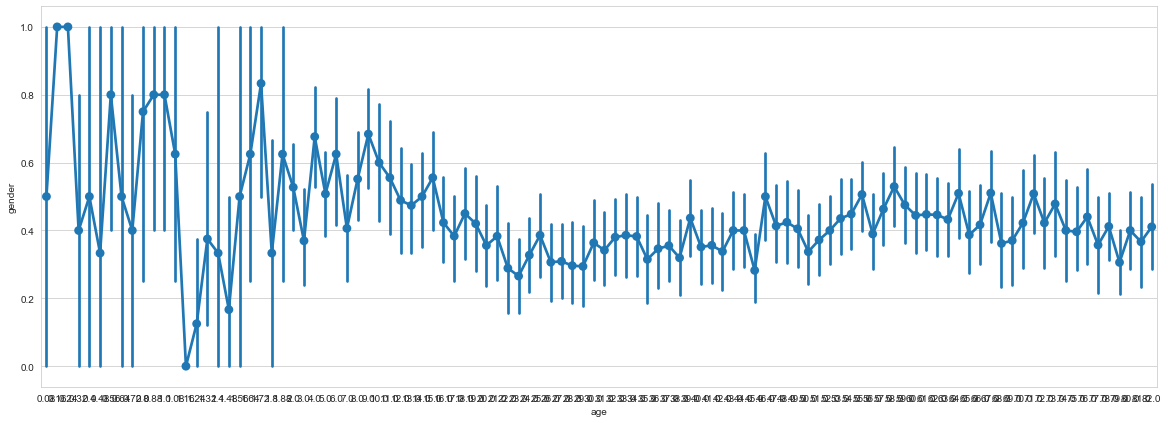

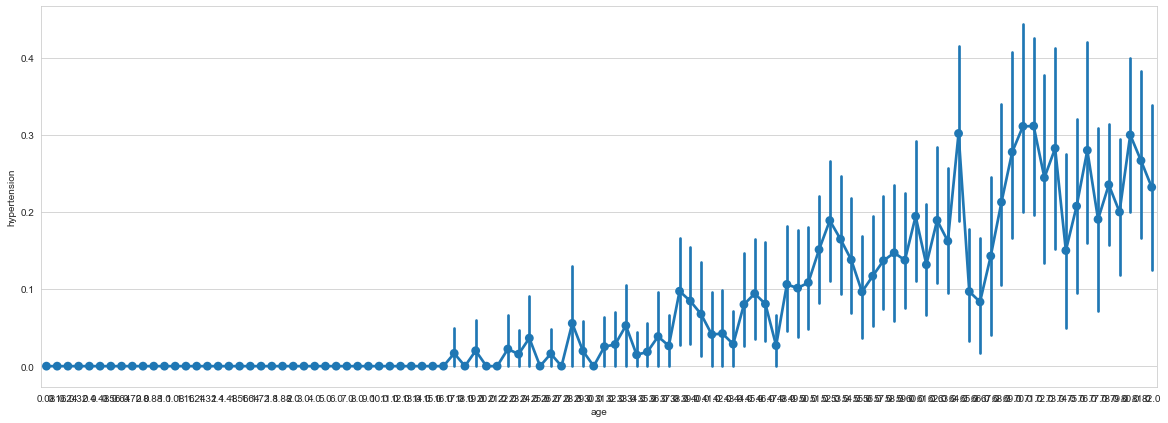

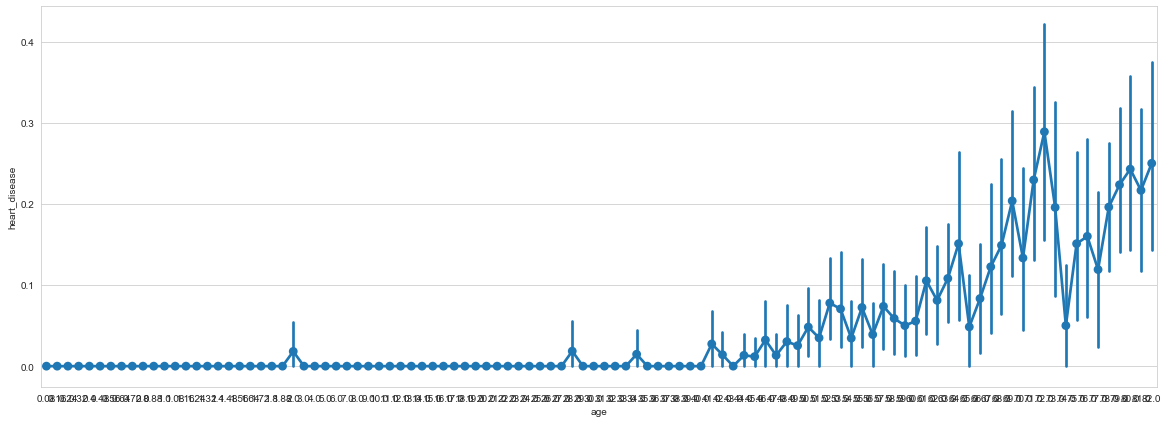

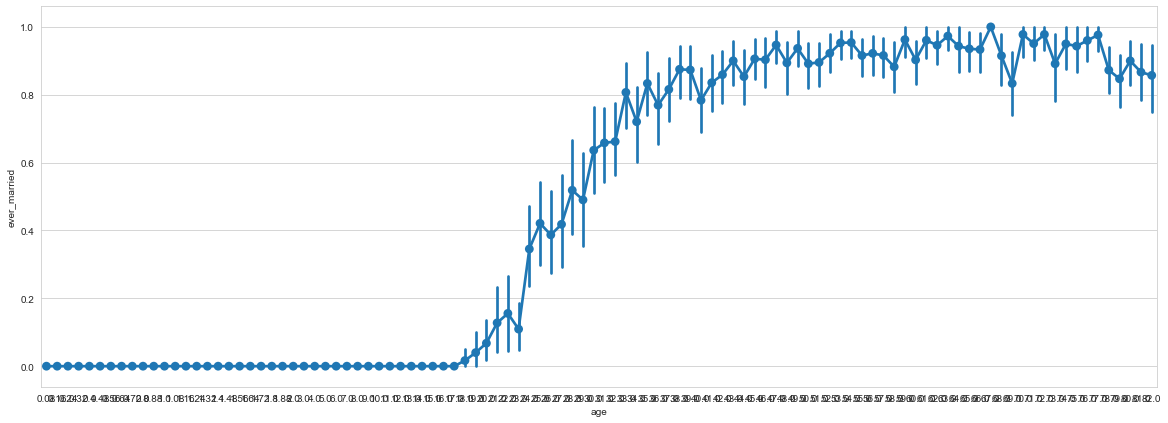

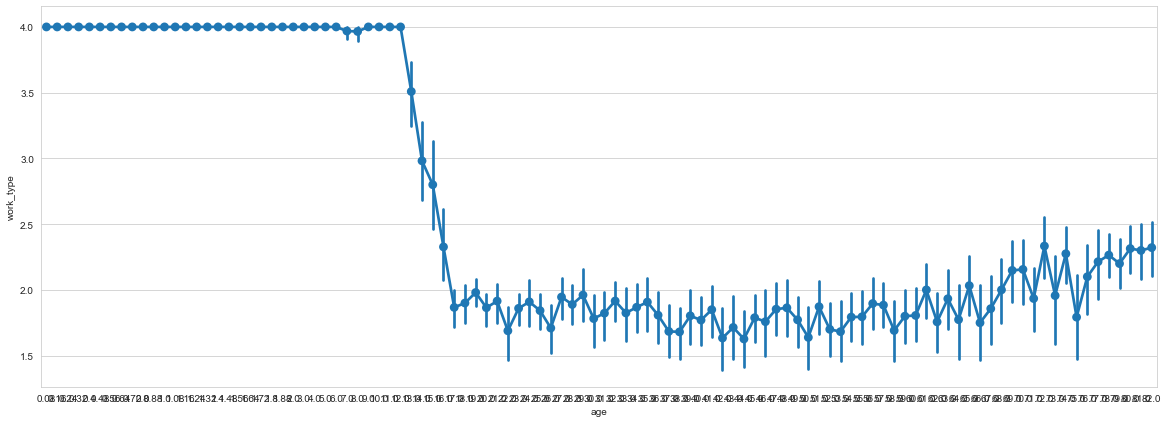

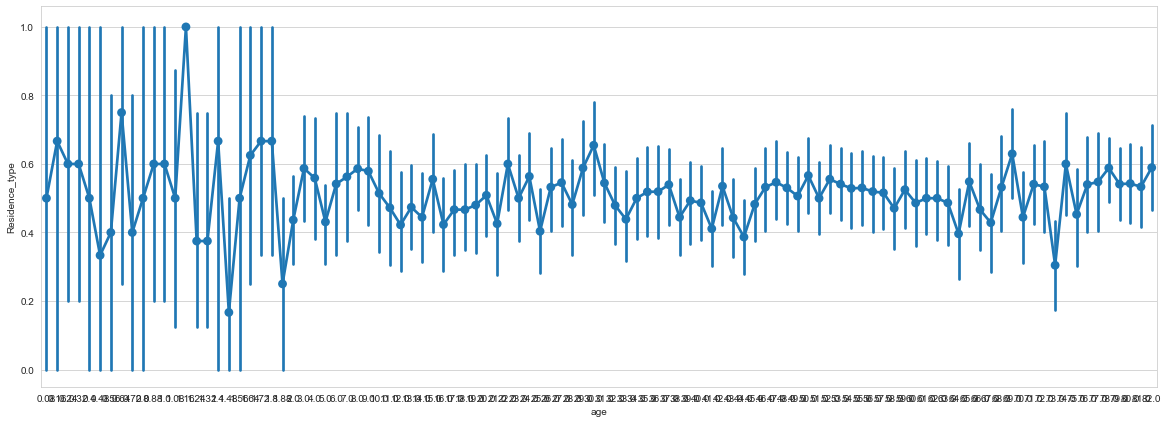

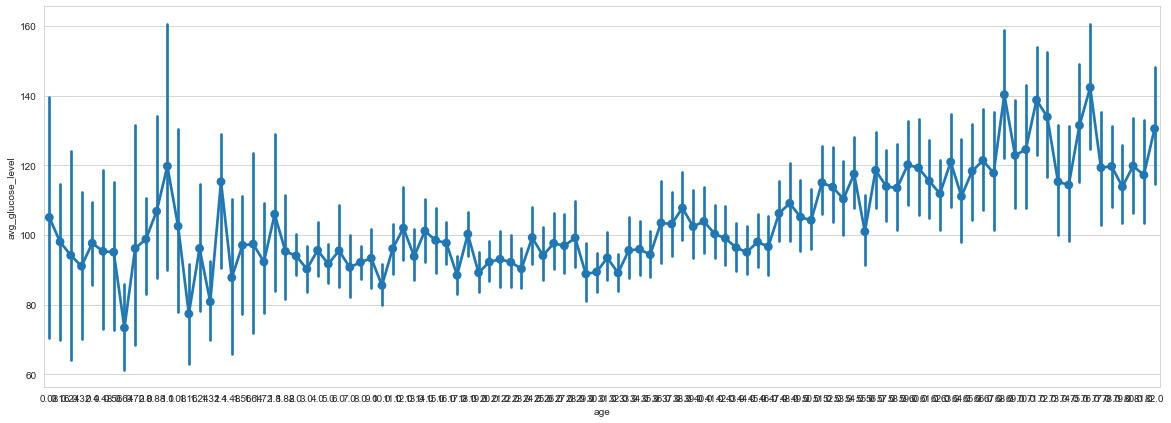

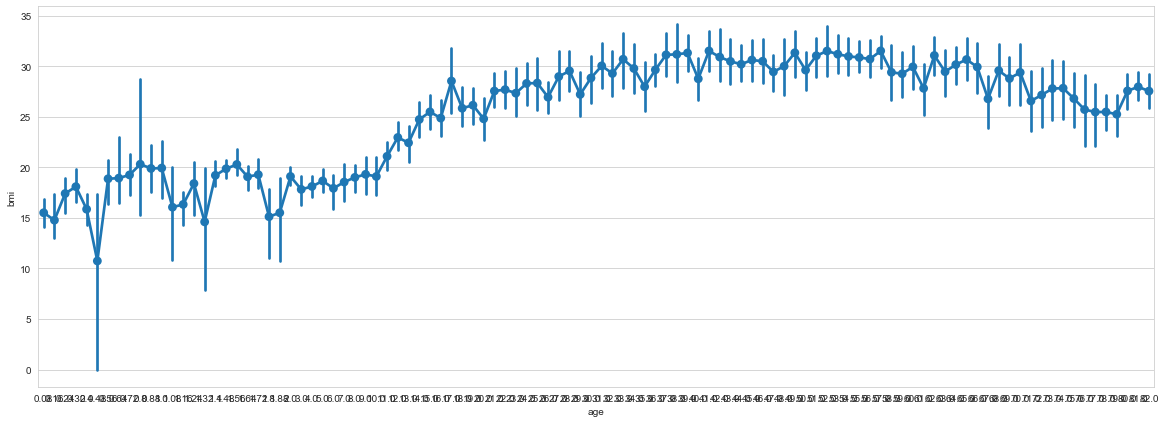

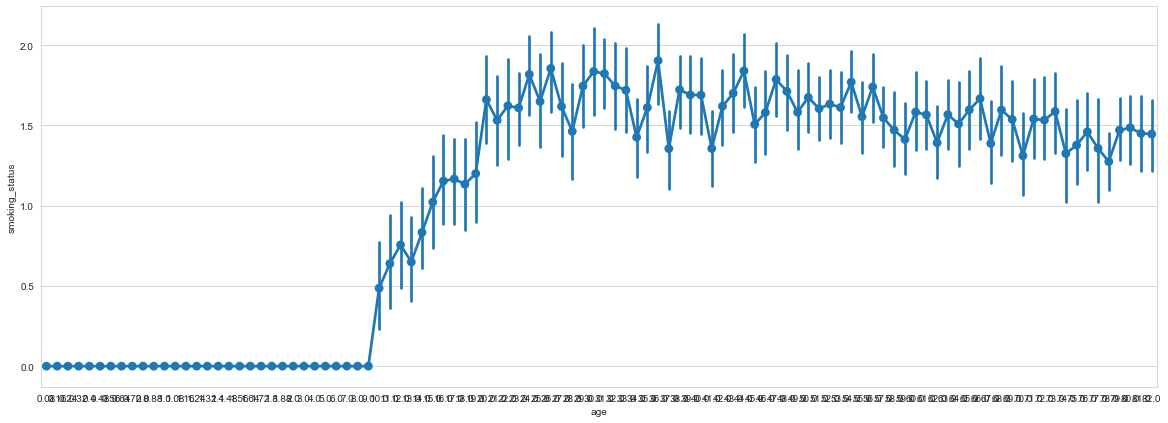

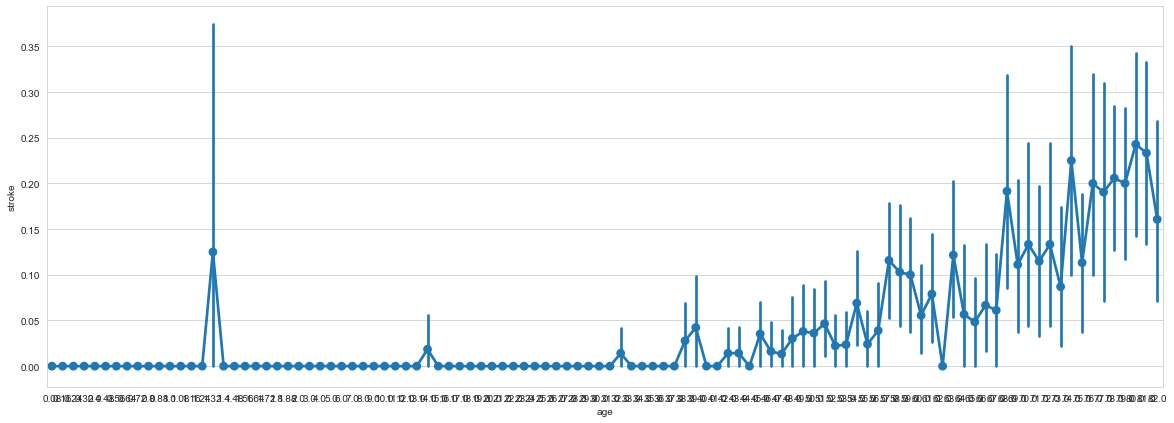

In [128]:
for i in ['gender',                   
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke']:
    plt.figure(figsize=(20,7))
    sns.pointplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

<Figure size 1440x504 with 0 Axes>

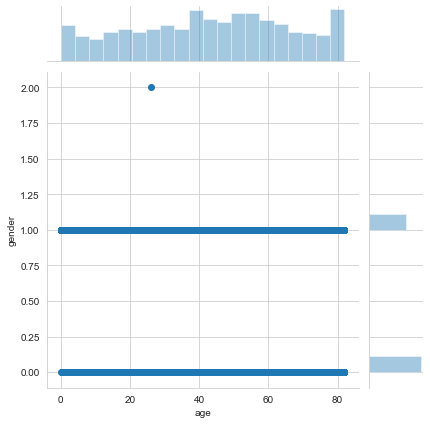

<Figure size 1440x504 with 0 Axes>

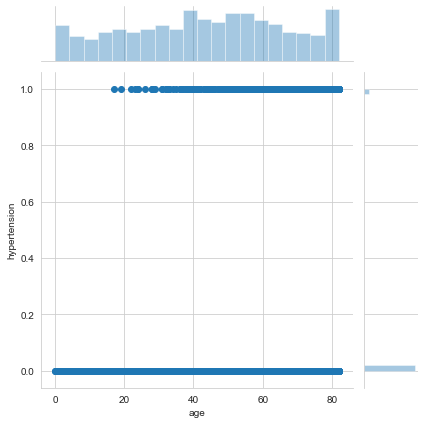

<Figure size 1440x504 with 0 Axes>

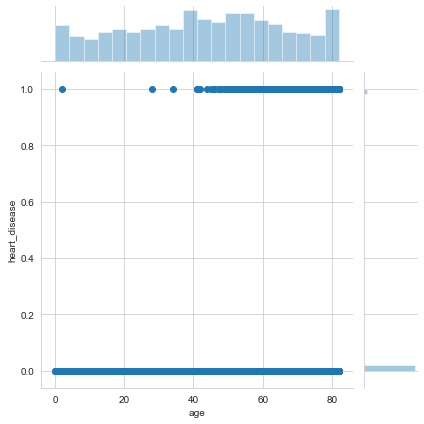

<Figure size 1440x504 with 0 Axes>

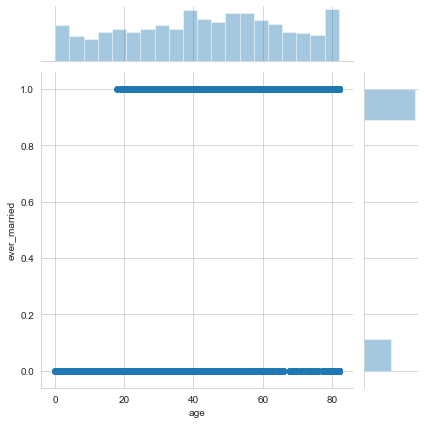

<Figure size 1440x504 with 0 Axes>

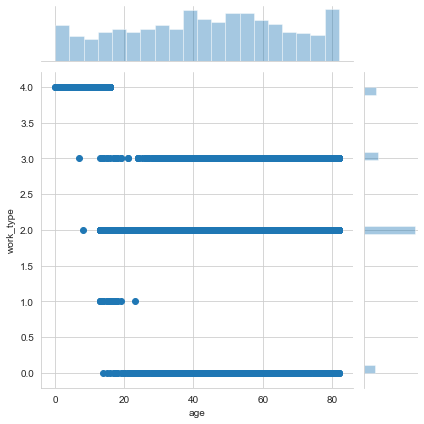

<Figure size 1440x504 with 0 Axes>

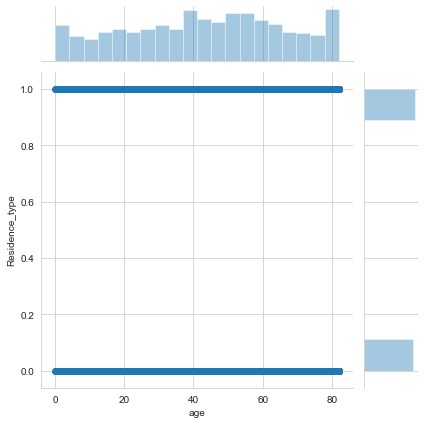

<Figure size 1440x504 with 0 Axes>

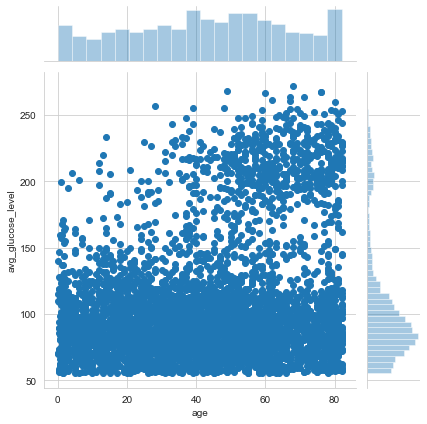

<Figure size 1440x504 with 0 Axes>

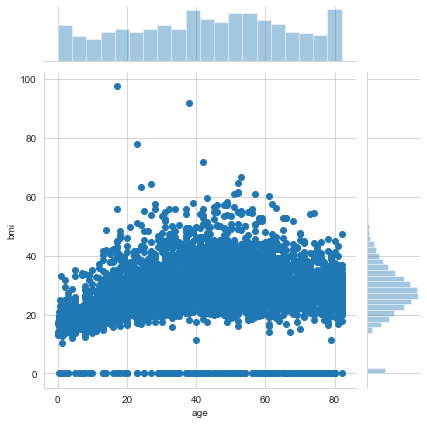

<Figure size 1440x504 with 0 Axes>

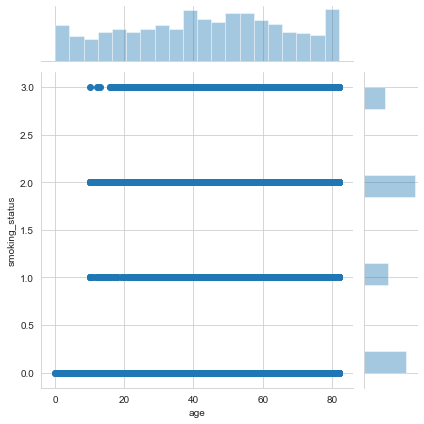

<Figure size 1440x504 with 0 Axes>

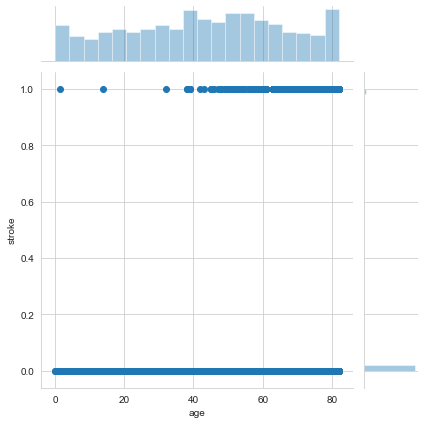

In [130]:
for i in ['gender',                   
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke']:
    plt.figure(figsize=(20,7))
    sns.jointplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

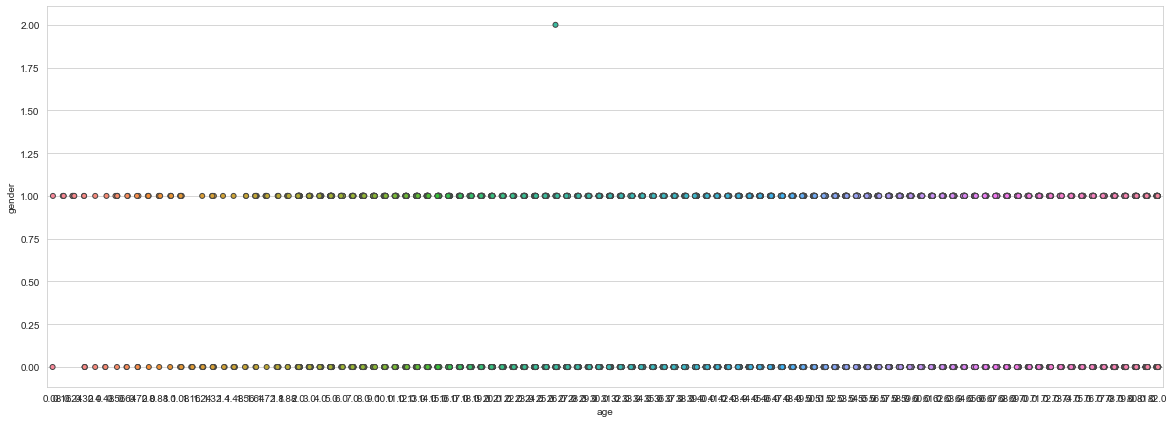

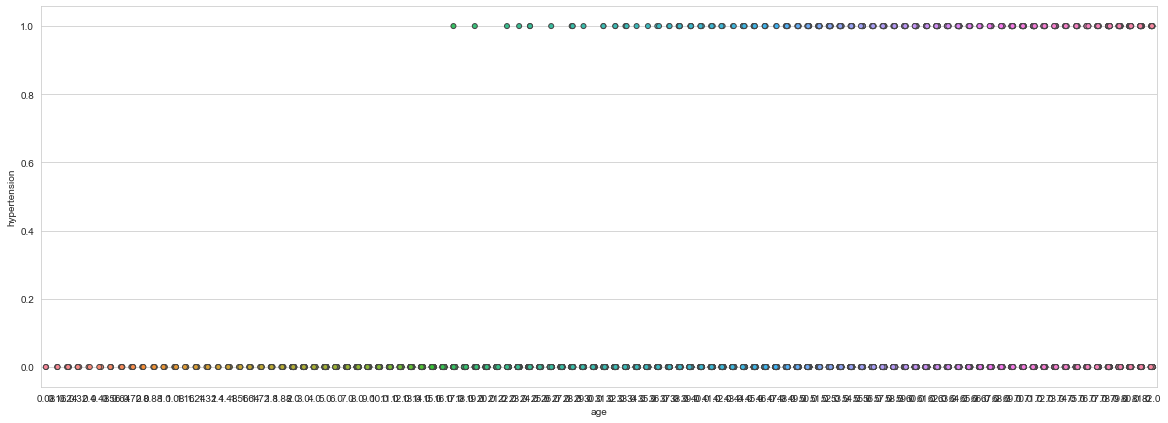

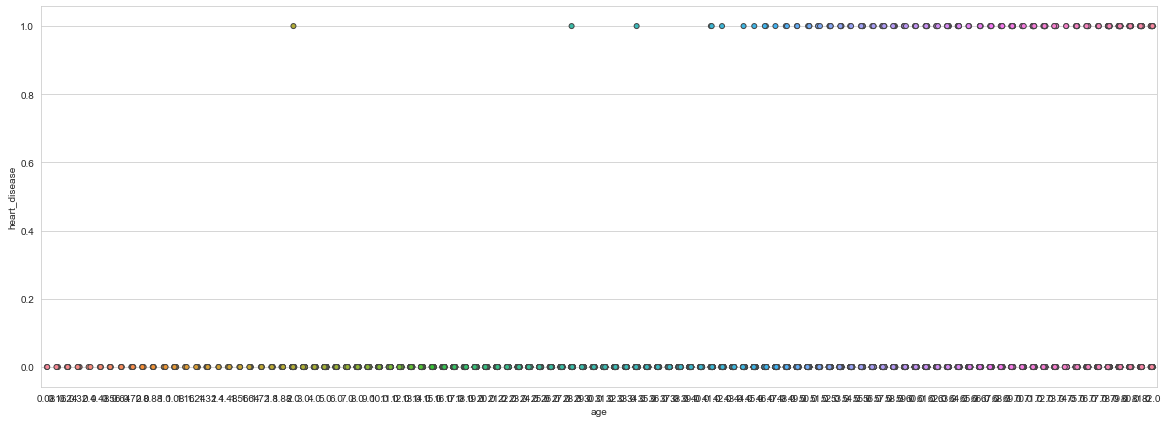

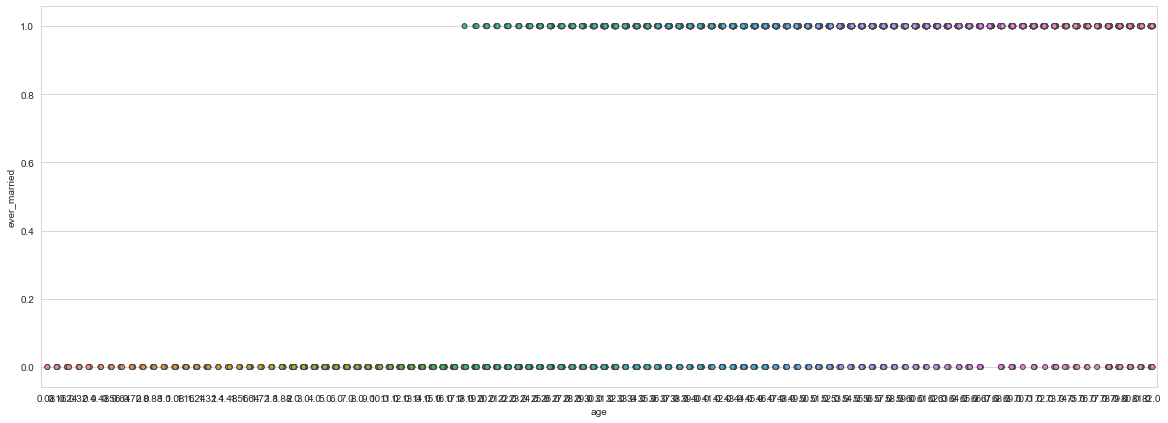

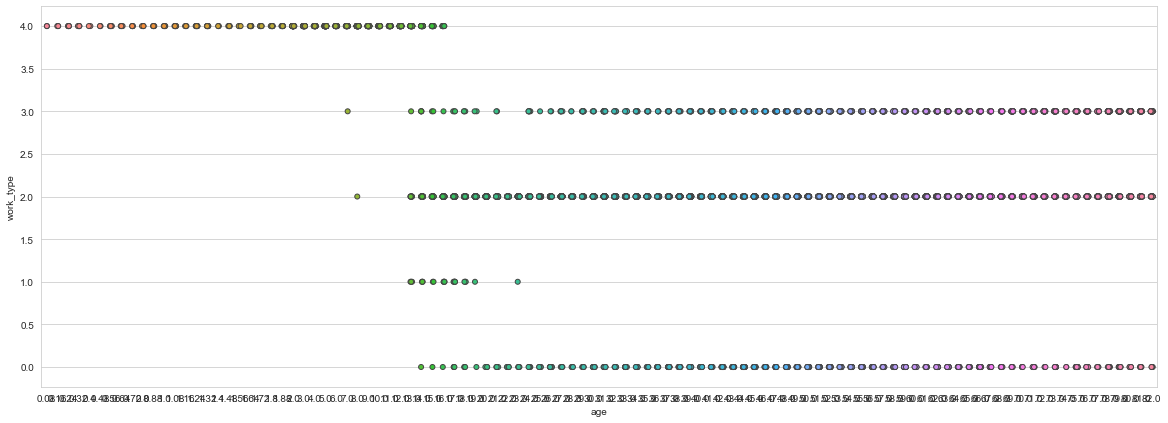

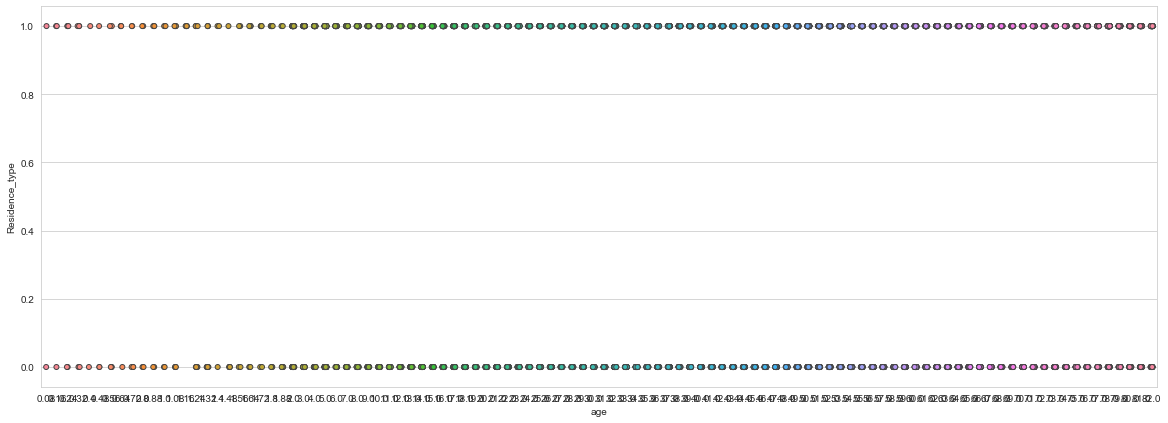

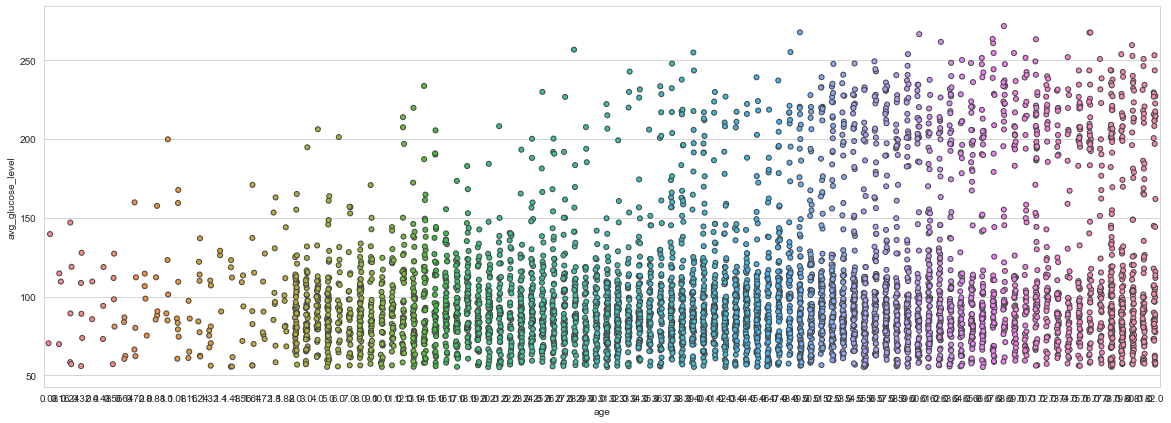

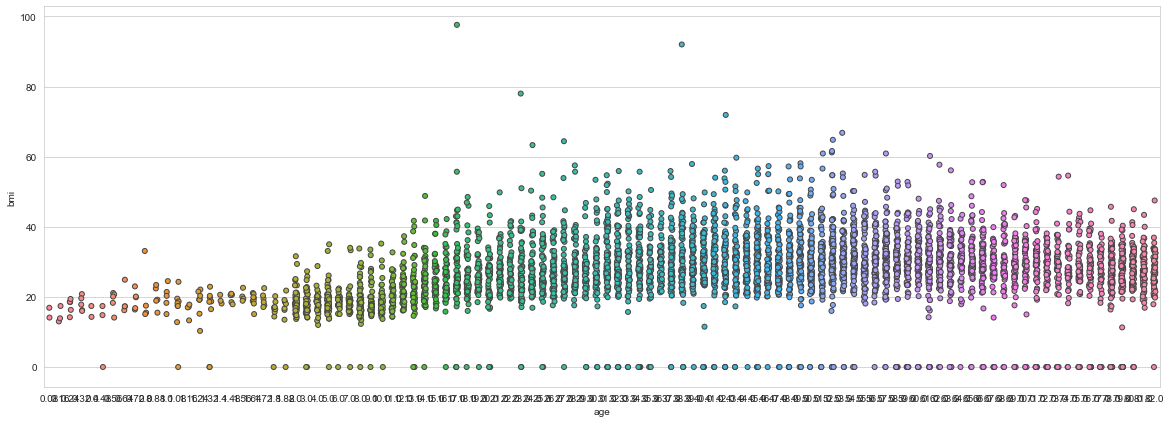

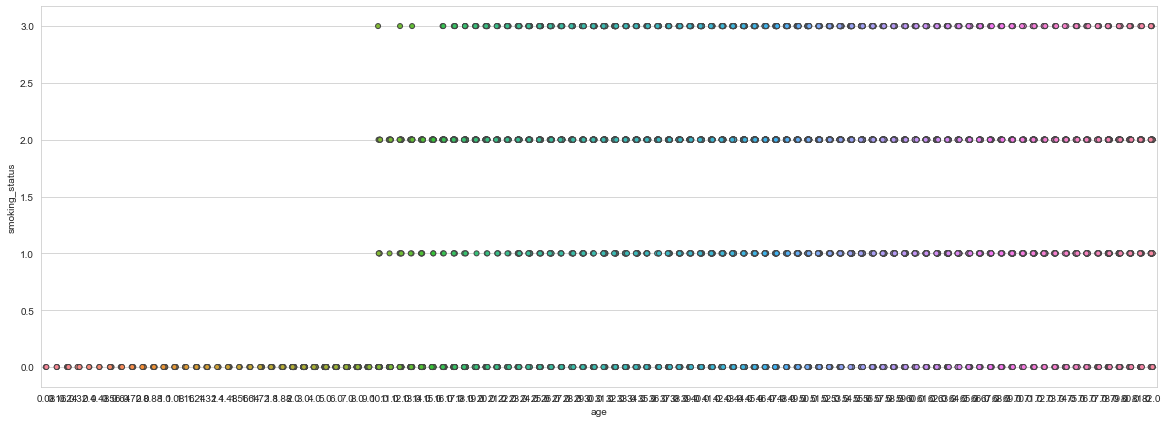

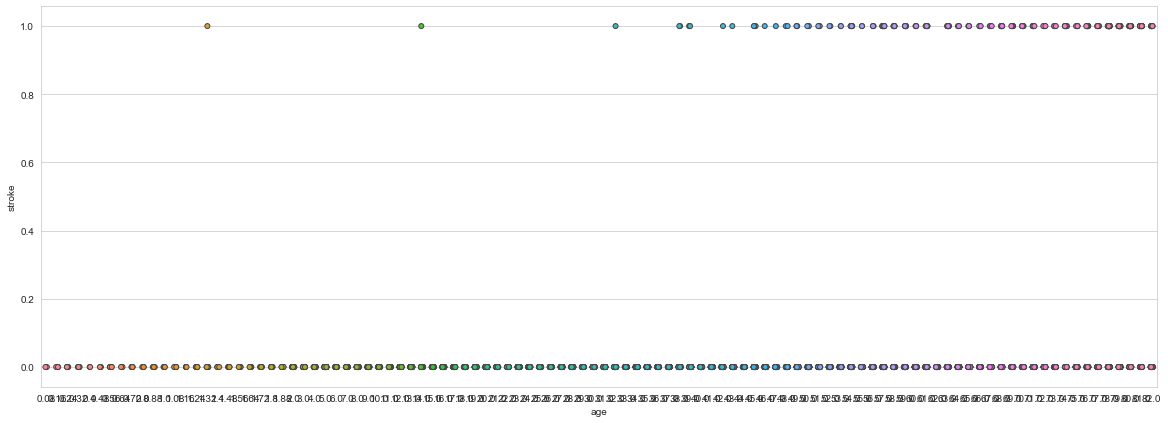

In [132]:
for i in ['gender',                   
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke']:
    plt.figure(figsize=(20,7))
    sns.stripplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

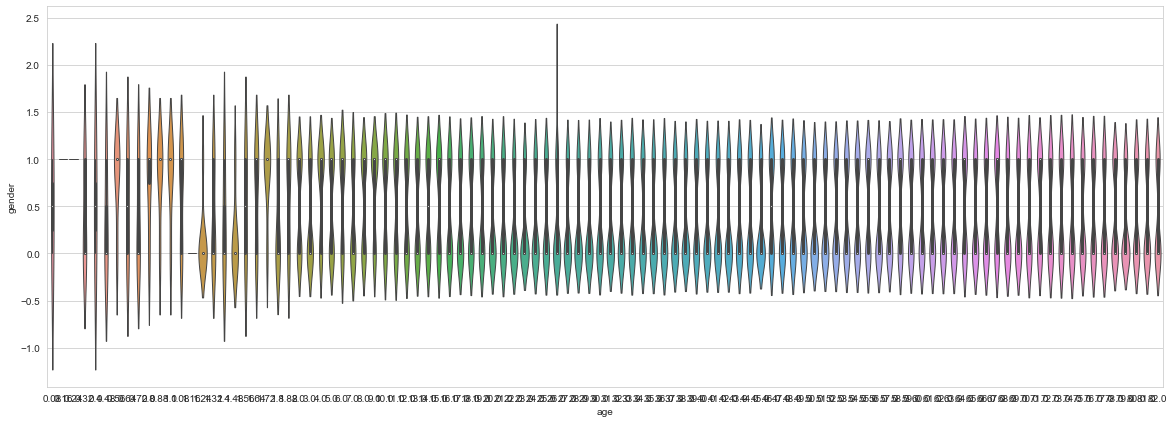

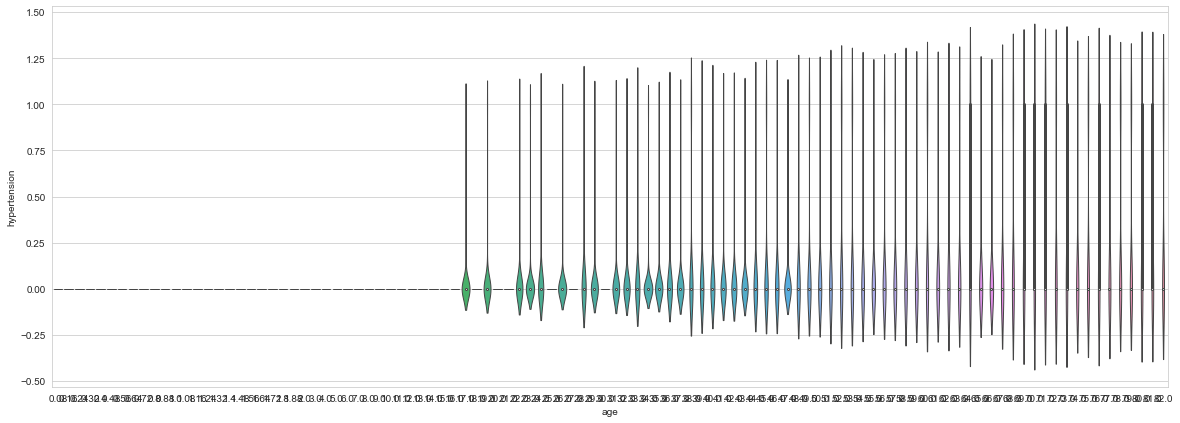

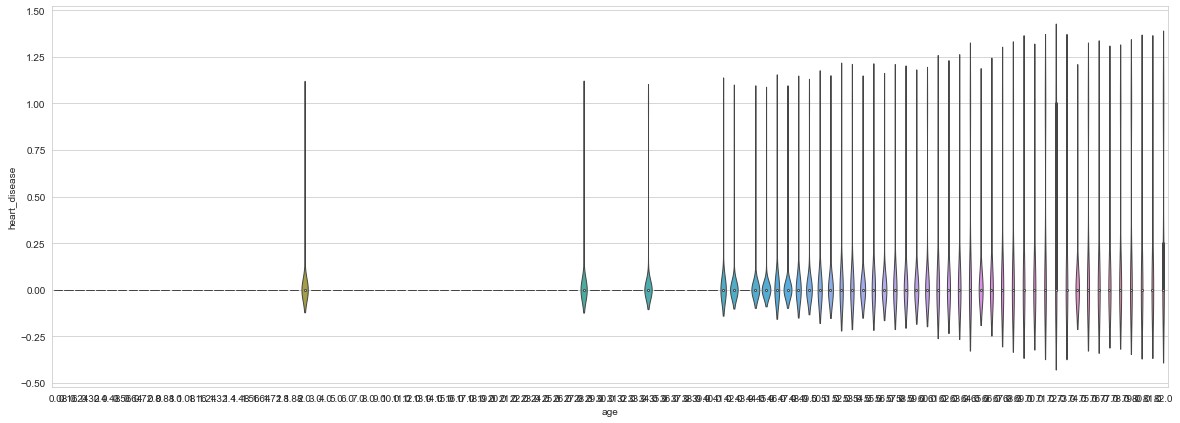

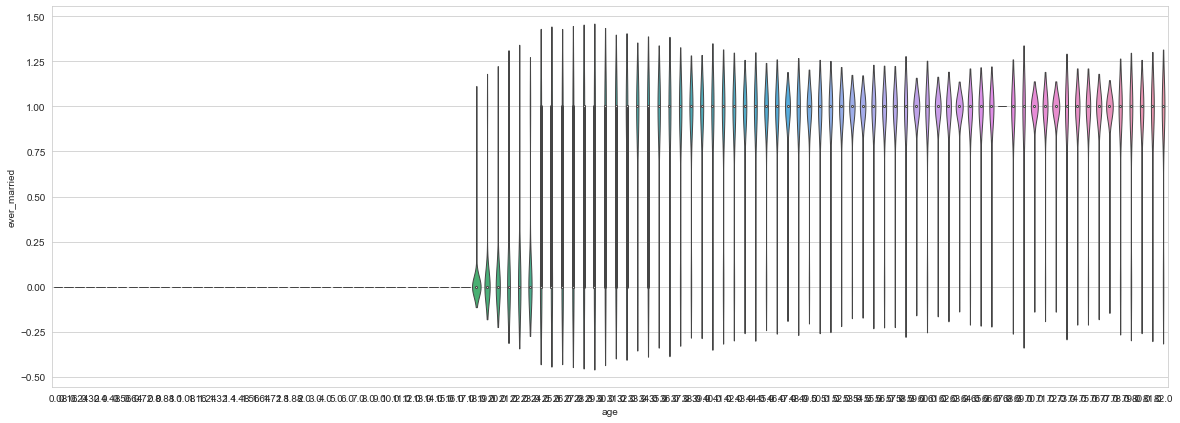

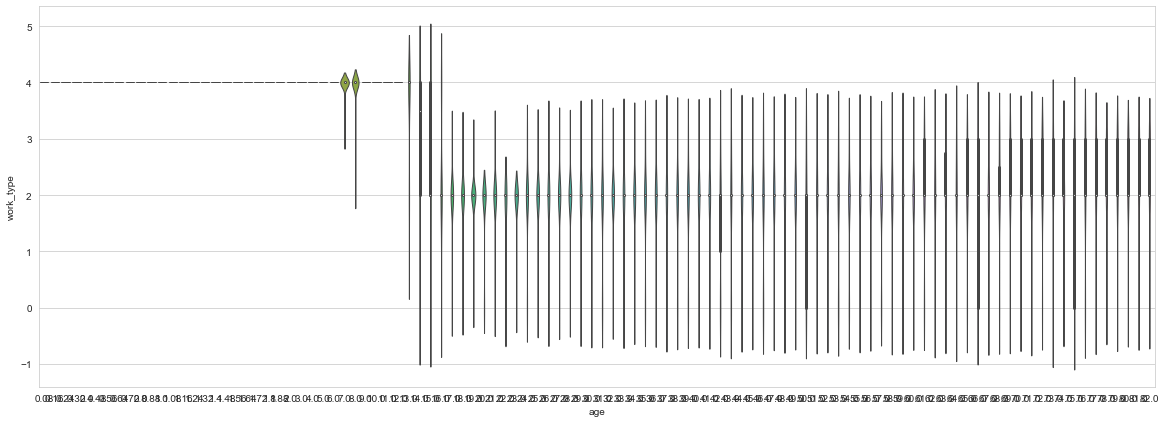

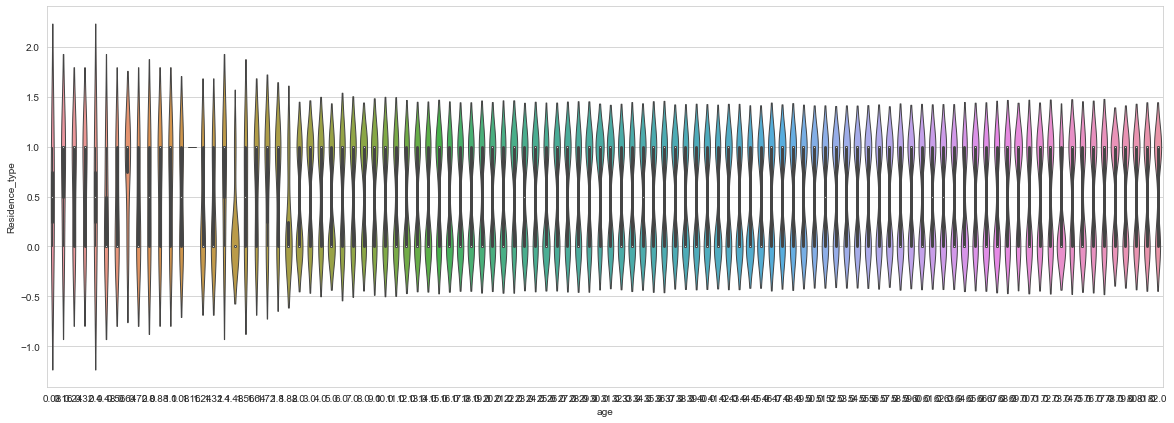

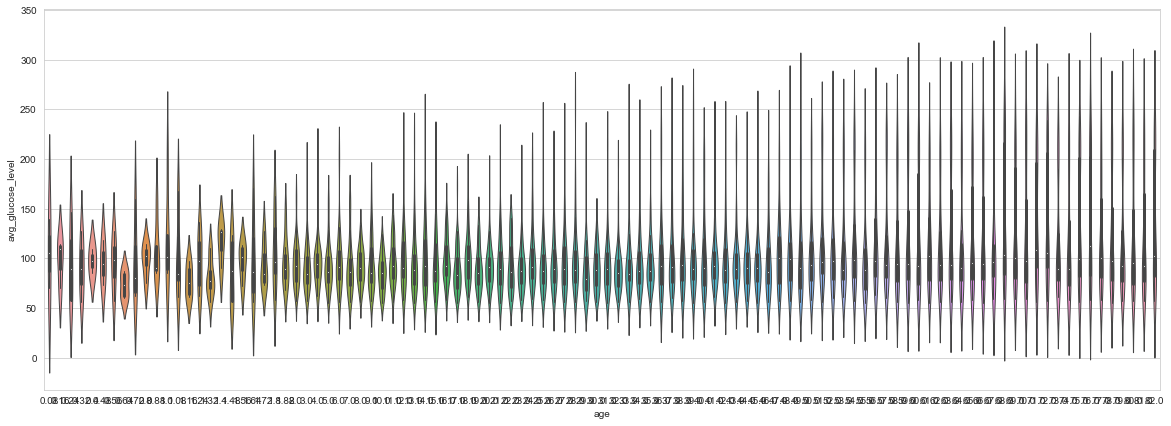

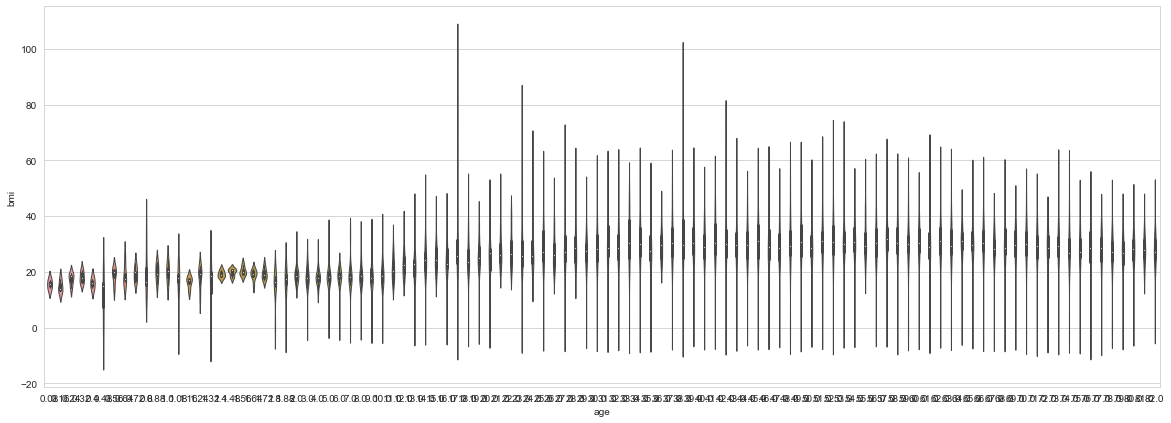

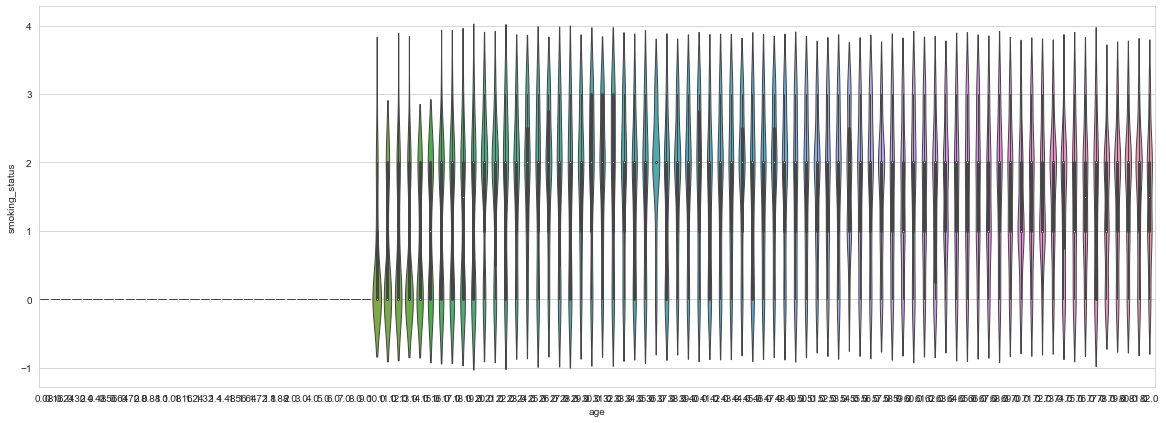

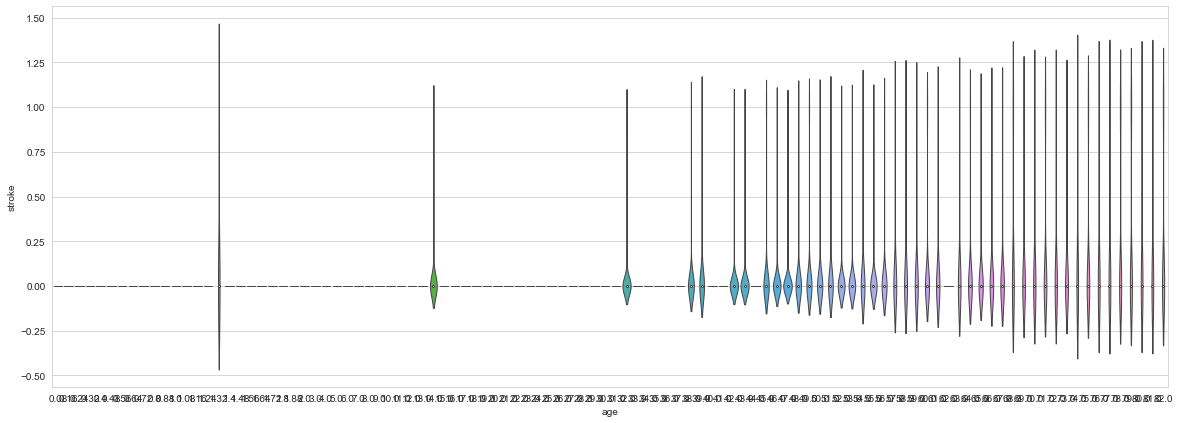

In [133]:
for i in ['gender',                   
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke']:
    plt.figure(figsize=(20,7))
    sns.violinplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

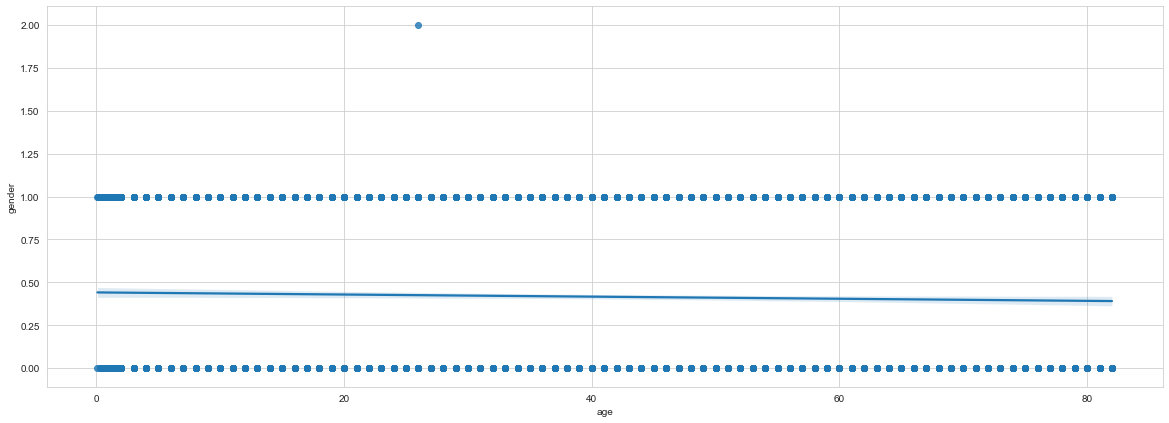

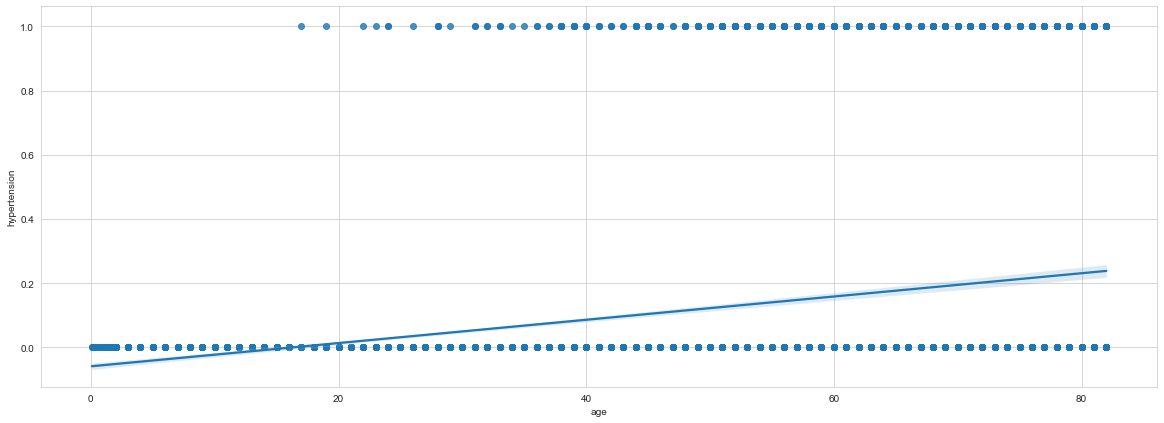

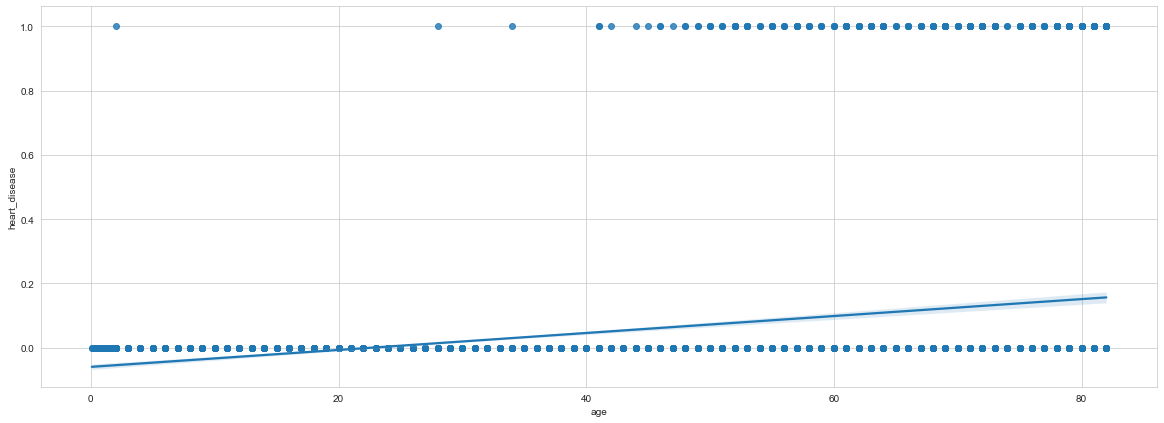

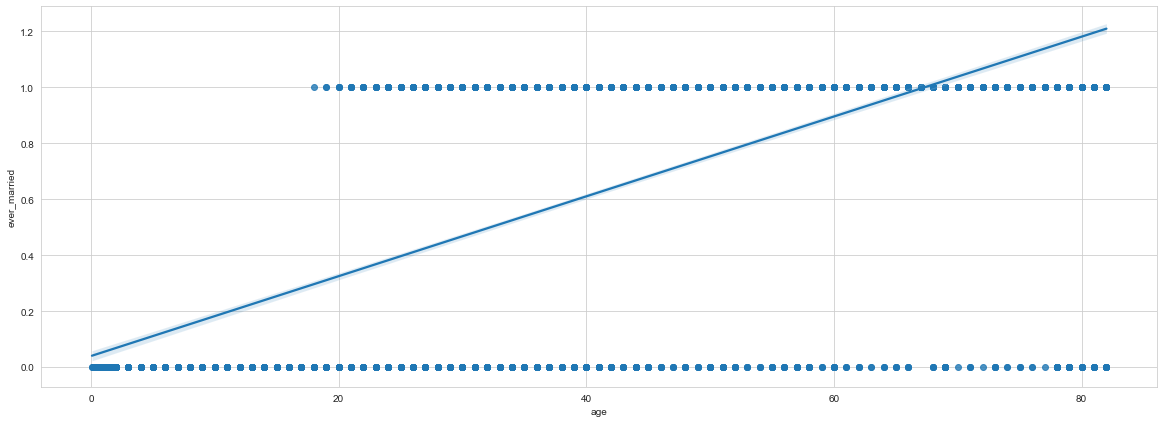

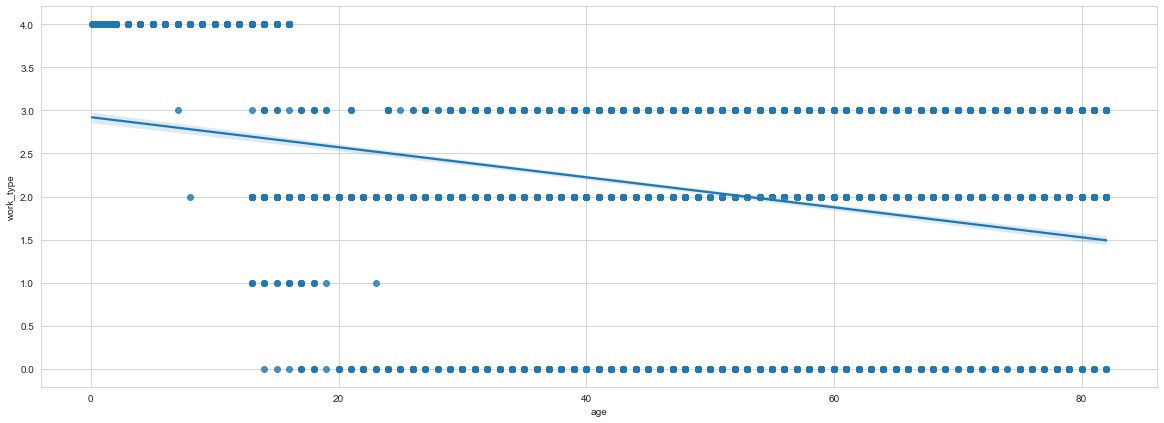

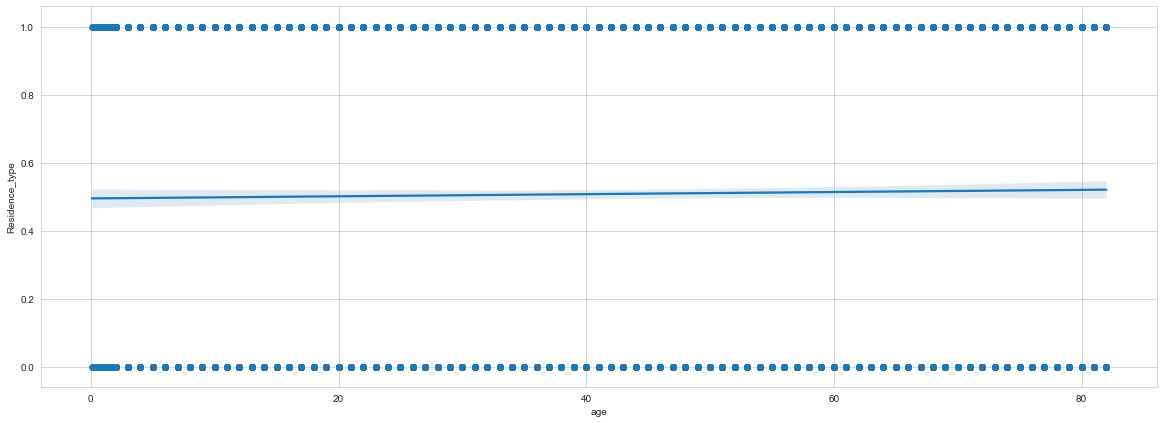

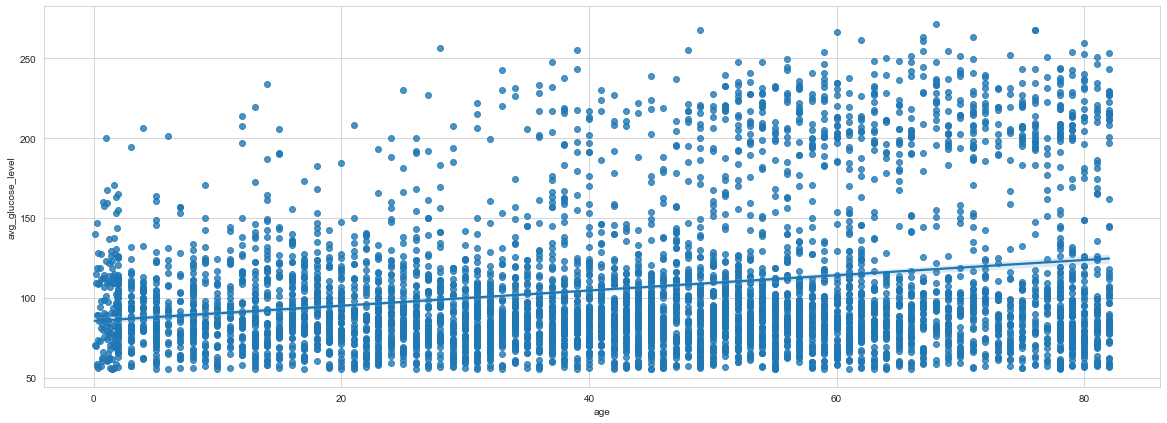

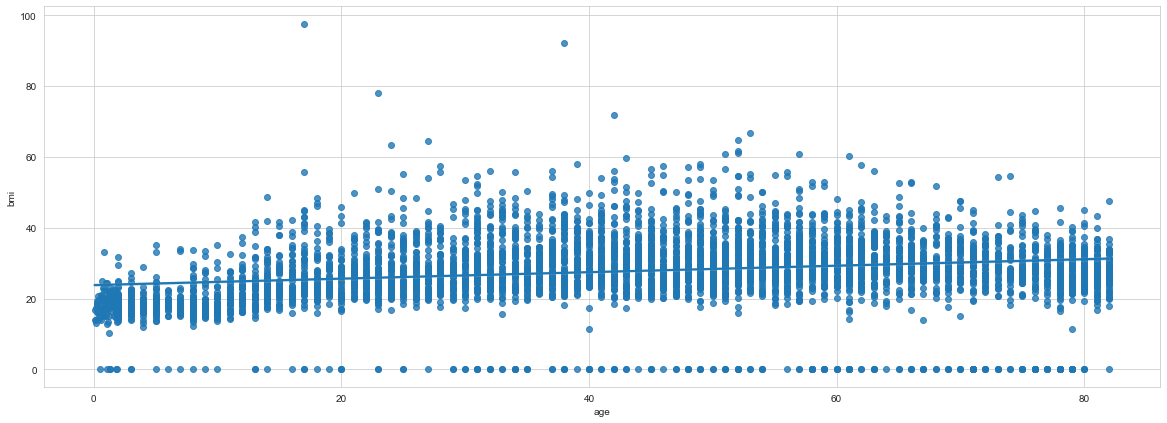

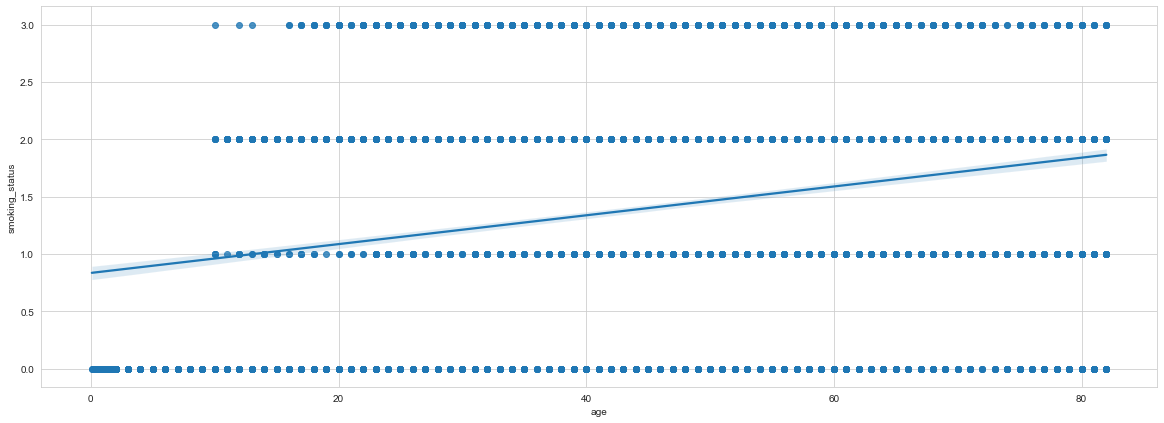

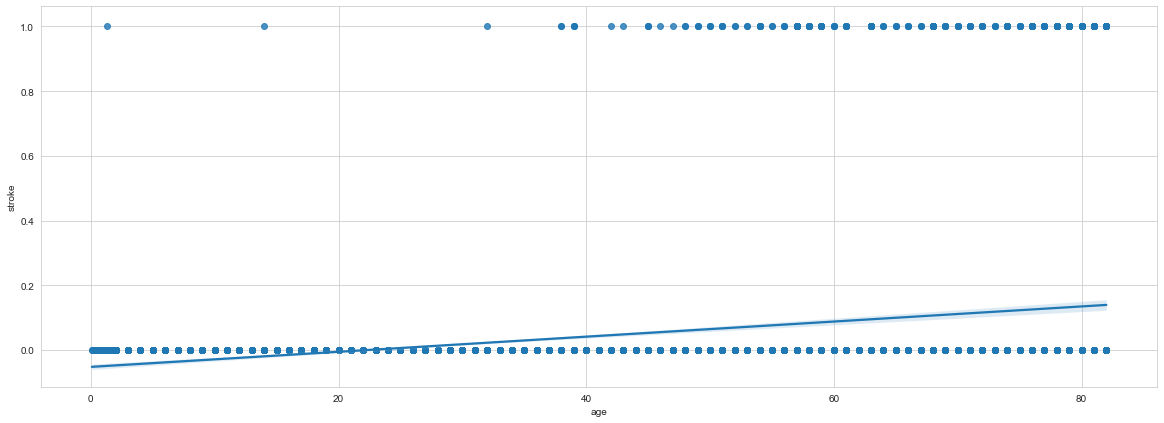

In [136]:
for i in ['gender',                   
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke']:
    plt.figure(figsize=(20,7))
    sns.regplot(x=df.age,y=df[i],data=df)
    plt.show()

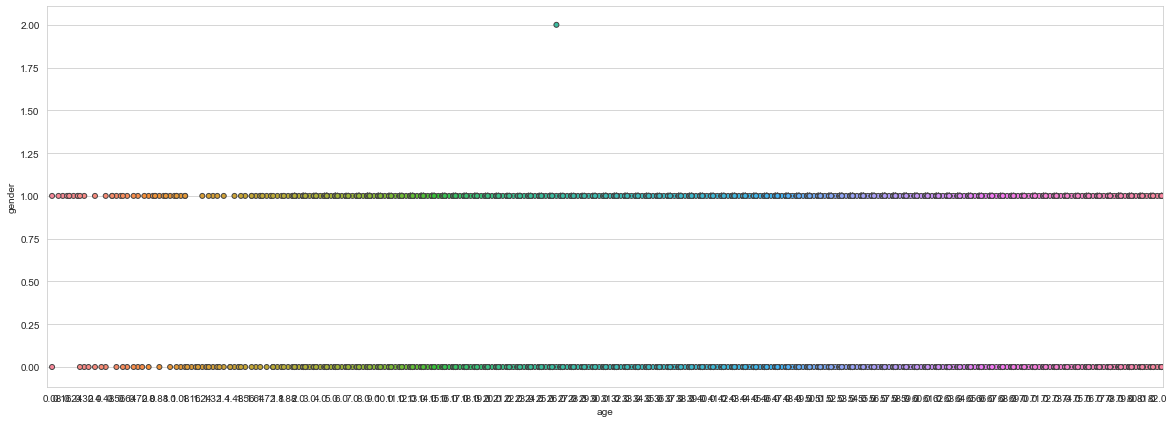

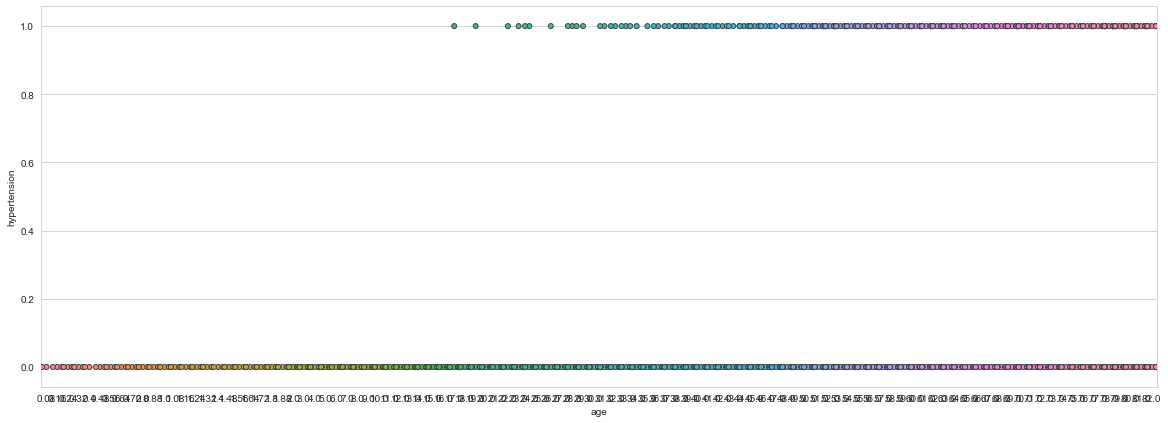

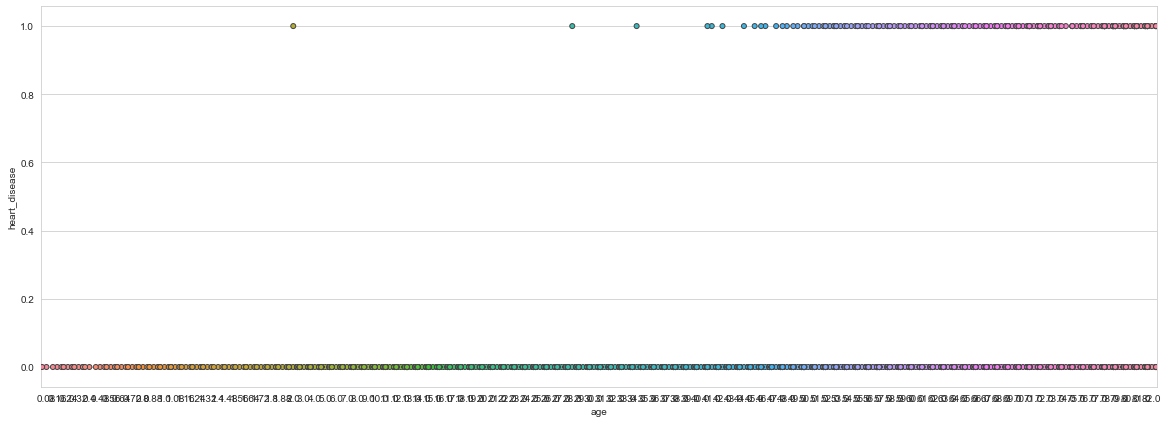

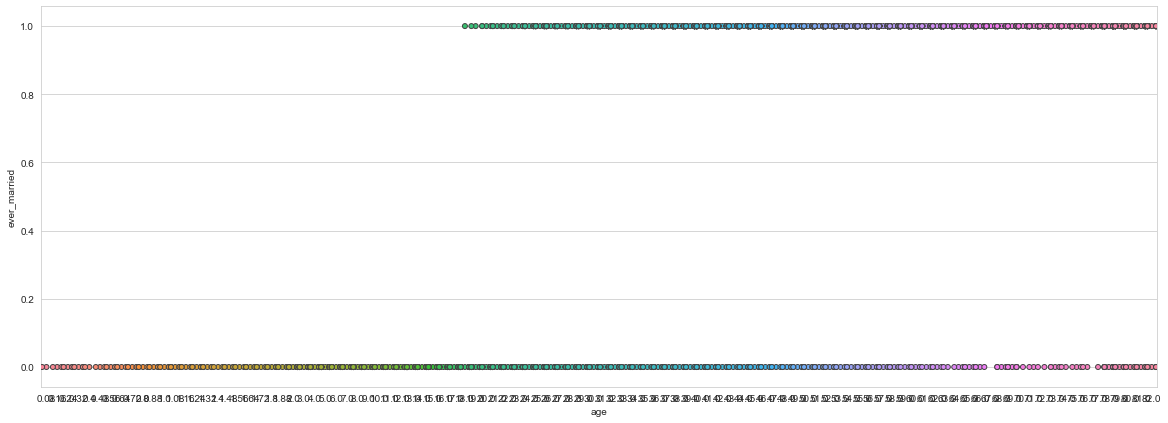

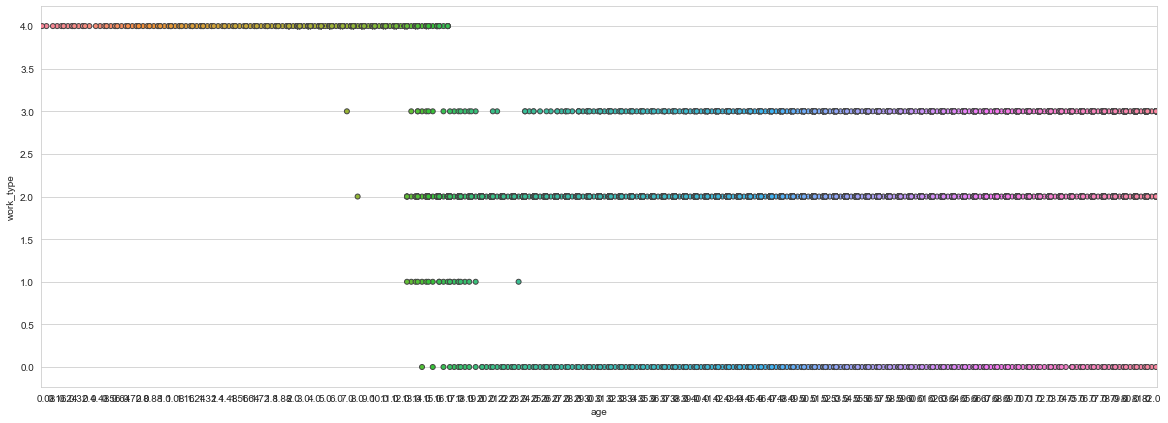

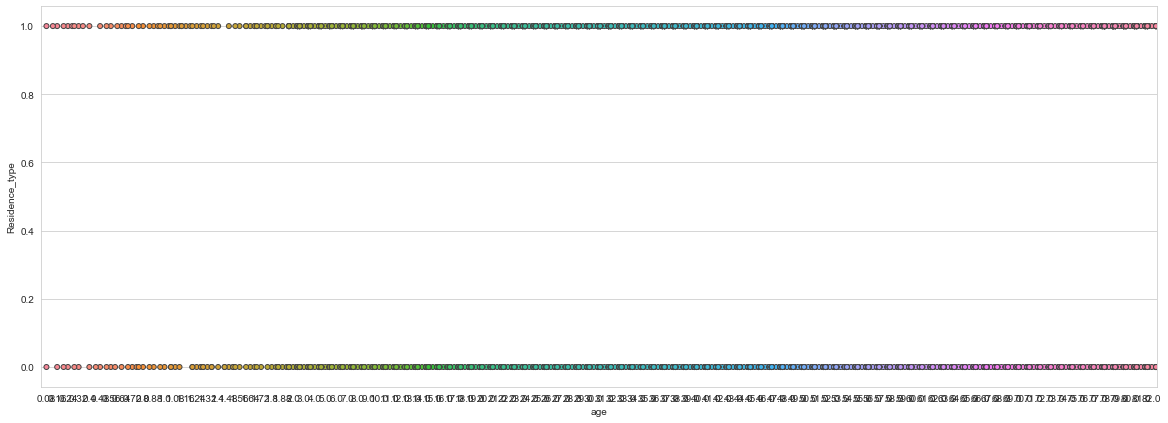

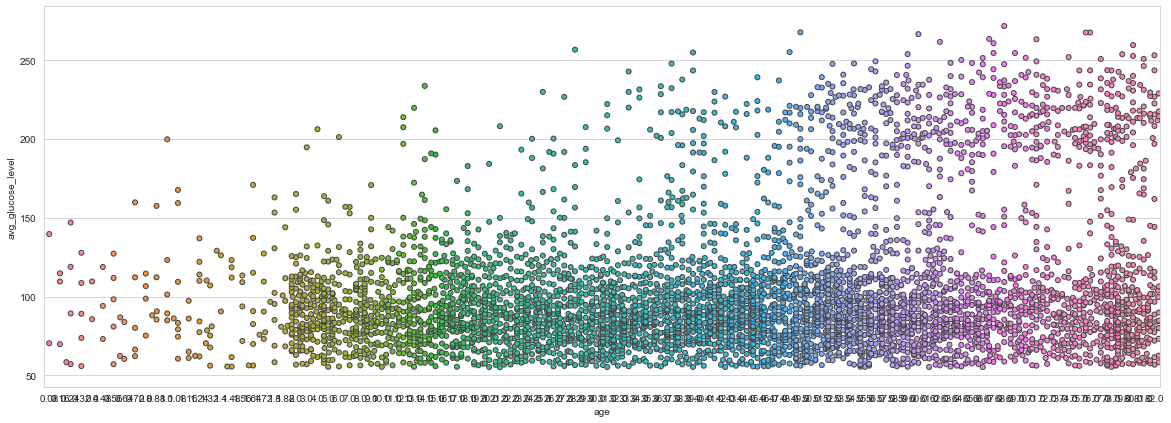

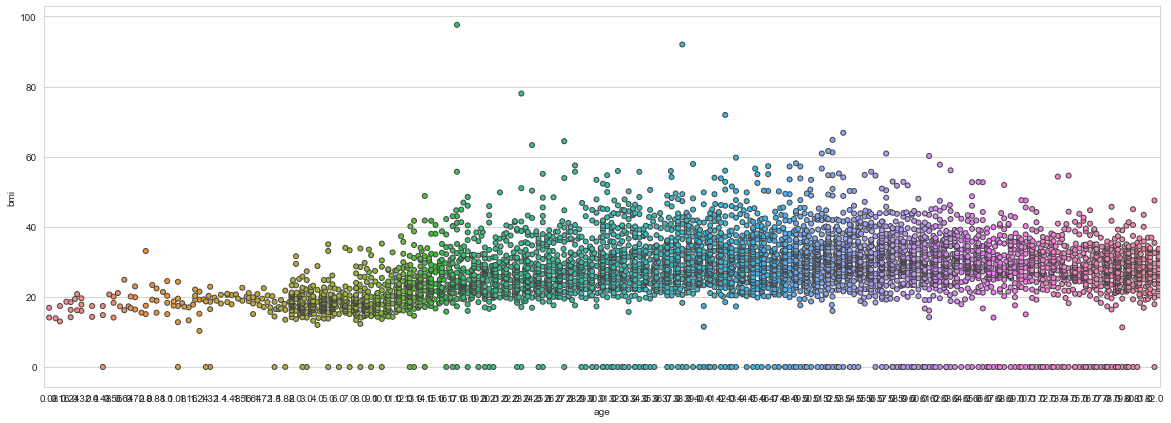

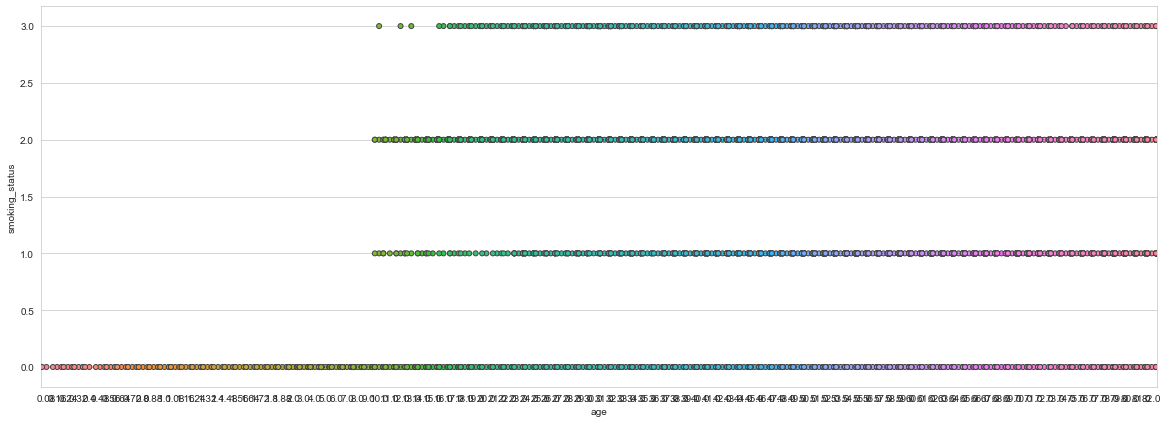

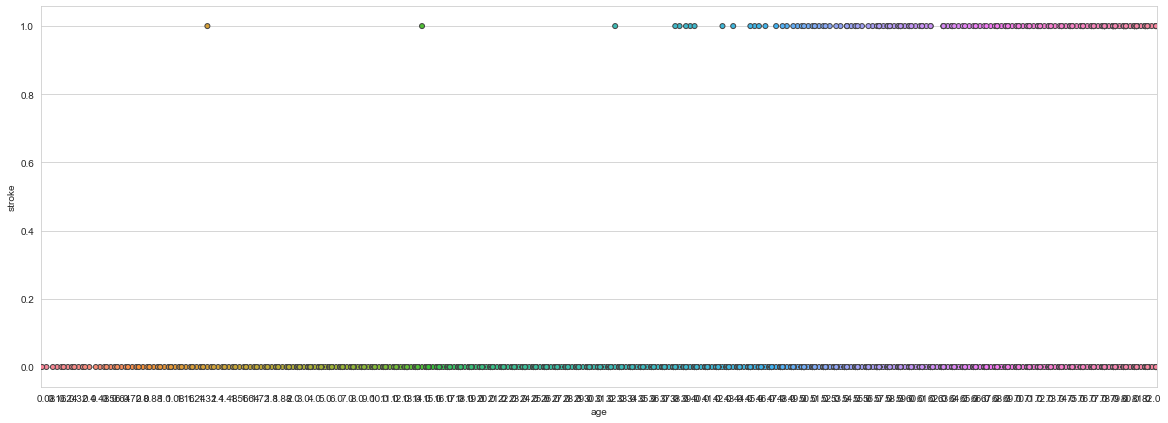

In [139]:
for i in ['gender',                   
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke']:
    plt.figure(figsize=(20,7))
    sns.swarmplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

In [142]:
df.columns

Index([               'gender',                   'age',
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke', ('age', 'hypertension'),
        'age by heart_disease', 'Age by Shucked Weight',
       'Age by smoking_status',            'Age by bmi'],
      dtype='object')

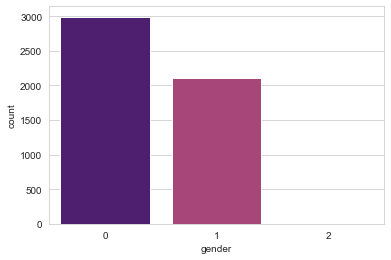

In [145]:
sns.countplot(x='gender',data=df,palette='magma')

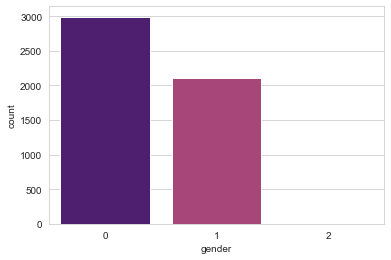

In [149]:
sns.countplot(x='gender',data=df,palette='magma')

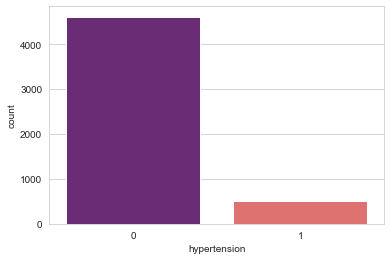

In [151]:
sns.countplot(x='hypertension',data=df,palette='magma')

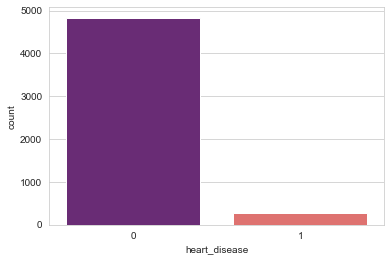

In [152]:
sns.countplot(x='heart_disease',data=df,palette='magma')

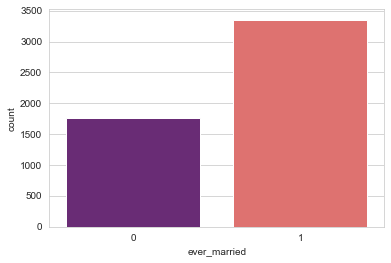

In [153]:
sns.countplot(x='ever_married',data=df,palette='magma')

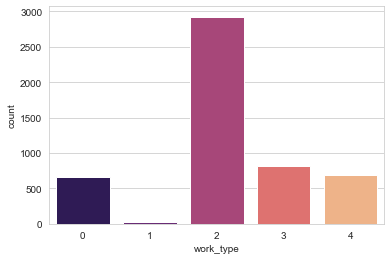

In [154]:
sns.countplot(x='work_type',data=df,palette='magma')

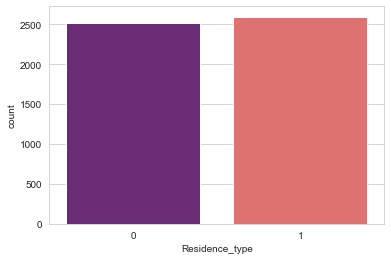

In [155]:
sns.countplot(x='Residence_type',data=df,palette='magma')

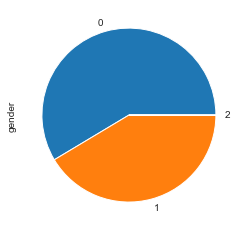

In [148]:
df.gender.value_counts().plot(kind='pie')

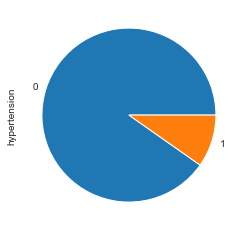

In [158]:
df.hypertension.value_counts().plot(kind='pie')

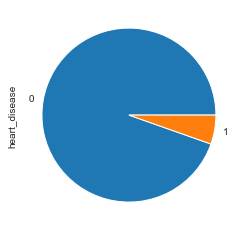

In [159]:
df.heart_disease.value_counts().plot(kind='pie')

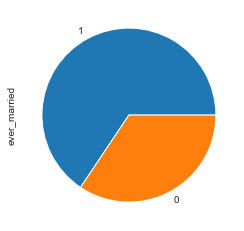

In [160]:
df.ever_married.value_counts().plot(kind='pie')

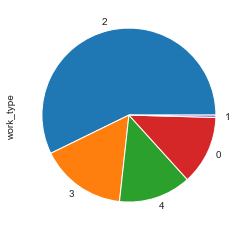

In [161]:
df.work_type.value_counts().plot(kind='pie')

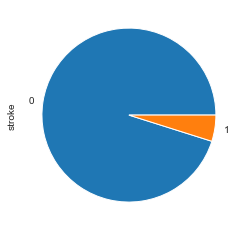

In [162]:
df.stroke.value_counts().plot(kind='pie')

In [163]:
df.columns

Index([               'gender',                   'age',
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke', ('age', 'hypertension'),
        'age by heart_disease', 'Age by Shucked Weight',
       'Age by smoking_status',            'Age by bmi'],
      dtype='object')

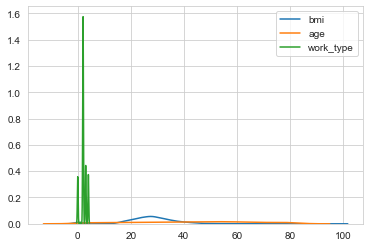

In [167]:
sns.kdeplot(df['bmi'])
sns.kdeplot(df['age'])
sns.kdeplot(df['work_type'])

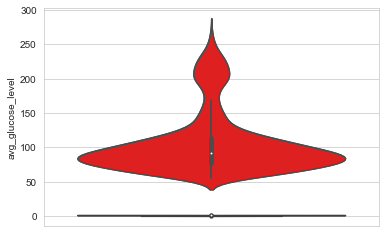

In [168]:
sns.violinplot(y="ever_married",data=df)
sns.violinplot(y="avg_glucose_level",data=df,color='orange')
sns.violinplot(y="avg_glucose_level",data=df,color='red')

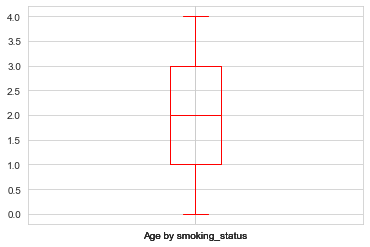

In [169]:
df.boxplot(column="age by heart_disease")
df.boxplot(column="Age by Shucked Weight",color='orange')
df.boxplot(column="Age by smoking_status",color='red')

In [170]:
import sweetviz as sv

In [171]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [172]:
from IPython.display import IFrame

In [173]:
IFrame(src='Analyze.html',width=1000,height=600)

In [174]:
df.columns

Index([               'gender',                   'age',
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke', ('age', 'hypertension'),
        'age by heart_disease', 'Age by Shucked Weight',
       'Age by smoking_status',            'Age by bmi'],
      dtype='object')

In [175]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [176]:
man=MinMaxScaler()
feat=[ 'gender',                   'age',
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke', ('age', 'hypertension'),
        'age by heart_disease', 'Age by Shucked Weight',
       'Age by smoking_status',            'Age by bmi']
df[feat]=man.fit_transform(df[feat])
df[feat]

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


gender       age  hypertension  heart_disease  ever_married  work_type  \
0        0.5  0.816895           0.0            1.0           1.0       0.50   
1        0.0  0.743652           0.0            0.0           1.0       0.75   
2        0.5  0.975586           0.0            1.0           1.0       0.50   
3        0.0  0.597168           0.0            0.0           1.0       0.50   
4        0.0  0.963379           1.0            0.0           1.0       0.75   
...      ...       ...           ...            ...           ...        ...   
5105     0.0  0.975586           1.0            0.0           1.0       0.50   
5106     0.0  0.987793           0.0            0.0           1.0       0.75   
5107     0.0  0.426270           0.0            0.0           1.0       0.75   
5108     0.5  0.621582           0.0            0.0           1.0       0.50   
5109     0.0  0.536133           0.0            0.0           1.0       0.00   

      Residence_type  avg_glucose_level       bmi  smoking_status  stroke  \
0                1.0           0.801265  0.375000        0.333333     1.0   
1                0.0           0.679023  0.000000        0.666667     1.0   
2                0.0           0.234512  0.332992        0.666667     1.0   
3                1.0           0.536008  0.352459        1.000000     1.0   
4                0.0           0.549349  0.245902        0.666667     1.0   
...              ...                ...       ...             ...     ...   
5105             1.0           0.132167  0.000000        0.666667     0.0   
5106             1.0           0.323516  0.409836        0.666667     0.0   
5107             0.0           0.128658  0.313525        0.666667     0.0   
5108             0.0           0.513203  0.262295        0.333333     0.0   
5109             1.0           0.139230  0.268443        0.000000     0.0   

      (age, hypertension)  age by heart_disease  Age by Shucked Weight  \
0                    1.00                  0.00                   0.75   
1                    1.00                  1.00                   0.75   
2                    0.00                  0.00                   0.50   
3                    0.50                  0.50                   0.00   
4                    0.00                  0.00                   0.50   
...                   ...                   ...                    ...   
5105                 0.00                  0.00                   0.50   
5106                 0.00                  0.00                   0.50   
5107                 0.25                  0.25                   1.00   
5108                 0.50                  0.50                   0.00   
5109                 0.50                  0.50                   0.00   

      Age by smoking_status  Age by bmi  
0                      0.75        1.00  
1                      0.75        0.50  
2                      0.50        1.00  
3                      0.00        0.00  
4                      0.50        1.00  
...                     ...         ...  
5105                   0.50        0.50  
5106                   0.50        1.00  
5107                   1.00        0.75  
5108                   0.00        0.00  
5109                   0.00        0.00  

[5110 rows x 16 columns]

In [177]:
std=StandardScaler()
feat=[ 'gender',                   'age',
                'hypertension',         'heart_disease',
                'ever_married',             'work_type',
              'Residence_type',     'avg_glucose_level',
                         'bmi',        'smoking_status',
                      'stroke', ('age', 'hypertension'),
        'age by heart_disease', 'Age by Shucked Weight',
       'Age by smoking_status',            'Age by bmi']
df[feat]=std.fit_transform(df[feat])
df[feat]

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


gender       age  hypertension  heart_disease  ever_married  \
0     1.188073  1.051434     -0.328602       4.185032      0.723884   
1    -0.840344  0.786070     -0.328602      -0.238947      0.723884   
2     1.188073  1.626390     -0.328602       4.185032      0.723884   
3    -0.840344  0.255342     -0.328602      -0.238947      0.723884   
4    -0.840344  1.582163      3.043196      -0.238947      0.723884   
...        ...       ...           ...            ...           ...   
5105 -0.840344  1.626390      3.043196      -0.238947      0.723884   
5106 -0.840344  1.670617     -0.328602      -0.238947      0.723884   
5107 -0.840344 -0.363842     -0.328602      -0.238947      0.723884   
5108  1.188073  0.343796     -0.328602      -0.238947      0.723884   
5109 -0.840344  0.034205     -0.328602      -0.238947      0.723884   

      work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
0     -0.153836        0.984080           2.706375  0.928080       -0.351781   
1      0.763438       -1.016178           2.121559 -2.913002        0.581552   
2     -0.153836       -1.016178          -0.005028  0.497795        0.581552   
3     -0.153836        0.984080           1.437358  0.697195        1.514885   
4      0.763438       -1.016178           1.501184 -0.394260        0.581552   
...         ...             ...                ...       ...             ...   
5105  -0.153836        0.984080          -0.494658 -2.913002        0.581552   
5106   0.763438        0.984080           0.420775  1.284902        0.581552   
5107   0.763438       -1.016178          -0.511443  0.298394        0.581552   
5108  -0.153836       -1.016178           1.328257 -0.226344       -0.351781   
5109  -1.988384        0.984080          -0.460867 -0.163375       -1.285114   

        stroke  (age, hypertension)  age by heart_disease  \
0     4.418381             1.362463             -1.464630   
1     4.418381             1.362463              1.387874   
2     4.418381            -1.494111             -1.464630   
3     4.418381            -0.065824             -0.038378   
4     4.418381            -1.494111             -1.464630   
...        ...                  ...                   ...   
5105 -0.226327            -1.494111             -1.464630   
5106 -0.226327            -1.494111             -1.464630   
5107 -0.226327            -0.779968             -0.751504   
5108 -0.226327            -0.065824             -0.038378   
5109 -0.226327            -0.065824             -0.038378   

      Age by Shucked Weight  Age by smoking_status  Age by bmi  
0                  0.704907               0.704907    1.375756  
1                  0.704907               0.704907    0.098599  
2                  0.014193               0.014193    1.375756  
3                 -1.367236              -1.367236   -1.178559  
4                  0.014193               0.014193    1.375756  
...                     ...                    ...         ...  
5105               0.014193               0.014193    0.098599  
5106               0.014193               0.014193    1.375756  
5107               1.395622               1.395622    0.737177  
5108              -1.367236              -1.367236   -1.178559  
5109              -1.367236              -1.367236   -1.178559  

[5110 rows x 16 columns]